In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data1 = pd.read_csv('/work/Daily_Cuaca_Kebumen.csv')

/tmp/ipykernel_190/1856311698.py:1: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/work/Daily_Cuaca_Kebumen.csv')


In [3]:
data2 = pd.read_csv('/work/Kebumen 2023-01-01 to 2024-12-31.csv')

In [4]:
data1.tail(10)

name    datetime  tempmax  tempmin  temp  feelslikemax  \
16380  Kebumen, Indonesia  2022-12-22     32.1     25.1  26.9          39.3   
16381  Kebumen, Indonesia  2022-12-23     31.6     23.7  25.9          38.4   
16382  Kebumen, Indonesia  2022-12-24     28.9     24.1  26.0          33.5   
16383  Kebumen, Indonesia  2022-12-25     28.7     24.5  25.9          33.8   
16384  Kebumen, Indonesia  2022-12-26     30.2     23.4  26.0          35.9   
16385  Kebumen, Indonesia  2022-12-27     30.1     23.8  26.2          35.2   
16386  Kebumen, Indonesia  2022-12-28     29.6     24.0  26.6          35.9   
16387  Kebumen, Indonesia  2022-12-29     32.1     24.2  26.5          38.4   
16388  Kebumen, Indonesia  2022-12-30     30.9     23.9  26.8          35.6   
16389  Kebumen, Indonesia  2022-12-31     31.1     24.1  26.8          36.2   

       feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
16380          25.1       28.6  23.4      82.0  ...         13.5      5.0   
16381          23.7       26.9  22.9      83.9  ...         10.0      7.0   
16382          24.1       27.0  22.6      81.9  ...         10.0      6.0   
16383          24.5       26.8  22.8      83.6  ...          7.3      5.0   
16384          23.4       27.0  22.9      83.3  ...         23.3      9.0   
16385          23.8       27.5  22.9      82.3  ...         20.2      8.0   
16386          24.0       27.9  23.2      82.0  ...         25.6     10.0   
16387          24.2       27.8  23.1      82.1  ...         16.4      9.0   
16388          23.9       28.4  22.6      78.4  ...         20.2     10.0   
16389          24.1       28.2  22.8      79.2  ...         20.6      9.0   

       severerisk     sunrise      sunset  moonphase              conditions  \
16380        30.0  1671686556  1671731809       0.96          Rain, Overcast   
16381        10.0  1671772986  1671818239       0.00          Rain, Overcast   
16382        10.0  1671859417  1671904668       0.03          Rain, Overcast   
16383        10.0  1671945847  1671991097       0.06          Rain, Overcast   
16384        30.0  1672032278  1672077525       0.10  Rain, Partially cloudy   
16385        10.0  1672118709  1672163953       0.13          Rain, Overcast   
16386        30.0  1672205140  1672250380       0.16  Rain, Partially cloudy   
16387        30.0  1672291571  1672336807       0.20          Rain, Overcast   
16388        30.0  1672378003  1672423234       0.25          Rain, Overcast   
16389        30.0  1672464434  1672509660       0.27          Rain, Overcast   

                                             description  icon  \
16380         Cloudy skies throughout the day with rain.  rain   
16381         Cloudy skies throughout the day with rain.  rain   
16382  Cloudy skies throughout the day with early mor...  rain   
16383         Cloudy skies throughout the day with rain.  rain   
16384  Partly cloudy throughout the day with a chance...  rain   
16385  Cloudy skies throughout the day with rain in t...  rain   
16386  Partly cloudy throughout the day with afternoo...  rain   
16387         Cloudy skies throughout the day with rain.  rain   
16388  Cloudy skies throughout the day with a chance ...  rain   
16389  Cloudy skies throughout the day with afternoon...  rain   

                 stations  
16380  96805099999,remote  
16381  96805099999,remote  
16382  96805099999,remote  
16383  96805099999,remote  
16384  96805099999,remote  
16385  96805099999,remote  
16386  96805099999,remote  
16387  96805099999,remote  
16388  96805099999,remote  
16389  96805099999,remote  

[10 rows x 33 columns]

In [5]:
data2.tail(10)

name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
721  Kebumen  2024-12-22     32.7     25.9  28.0          41.1          25.9   
722  Kebumen  2024-12-23     32.7     25.1  27.8          40.3          25.1   
723  Kebumen  2024-12-24     31.1     25.1  26.8          38.0          25.1   
724  Kebumen  2024-12-25     32.4     25.1  27.7          39.9          25.1   
725  Kebumen  2024-12-26     29.4     25.1  26.8          35.3          25.1   
726  Kebumen  2024-12-27     32.7     25.1  28.5          39.5          25.1   
727  Kebumen  2024-12-28     27.8     25.4  26.6          32.5          25.4   
728  Kebumen  2024-12-29     26.2     25.0  25.5          26.2          25.0   
729  Kebumen  2024-12-30     29.6     24.5  26.7          33.6          24.5   
730  Kebumen  2024-12-31     28.4     24.0  26.1          31.7          24.0   

     feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
721       30.6  24.8      83.5  ...         18.4        8          30   
722       30.8  24.7      84.1  ...         18.6        9          30   
723       28.7  24.7      88.9  ...          7.7        4          30   
724       30.5  24.7      84.6  ...         14.5        8          10   
725       28.8  24.4      86.9  ...         12.7        7          30   
726       32.2  24.9      81.7  ...         15.6        6          10   
727       28.4  23.6      83.9  ...          8.1        6          30   
728       25.5  22.5      83.7  ...          3.4        2          10   
729       28.2  22.6      78.3  ...         25.8       10          10   
730       27.0  23.0      83.5  ...         10.9        6          10   

                 sunrise               sunset  moonphase  \
721  2024-12-22T05:22:53  2024-12-22T17:57:05       0.72   
722  2024-12-23T05:23:23  2024-12-23T17:57:35       0.75   
723  2024-12-24T05:23:53  2024-12-24T17:58:04       0.78   
724  2024-12-25T05:24:24  2024-12-25T17:58:32       0.82   
725  2024-12-26T05:24:55  2024-12-26T17:59:00       0.85   
726  2024-12-27T05:25:26  2024-12-27T17:59:28       0.88   
727  2024-12-28T05:25:57  2024-12-28T17:59:55       0.91   
728  2024-12-29T05:26:28  2024-12-29T18:00:22       0.94   
729  2024-12-30T05:27:00  2024-12-30T18:00:48       0.98   
730  2024-12-31T05:27:31  2024-12-31T18:01:14       0.00   

                 conditions  \
721  Rain, Partially cloudy   
722  Rain, Partially cloudy   
723          Rain, Overcast   
724  Rain, Partially cloudy   
725          Rain, Overcast   
726        Partially cloudy   
727          Rain, Overcast   
728          Rain, Overcast   
729  Rain, Partially cloudy   
730          Rain, Overcast   

                                           description               icon  \
721  Partly cloudy throughout the day with late aft...               rain   
722  Partly cloudy throughout the day with late aft...               rain   
723         Cloudy skies throughout the day with rain.               rain   
724        Partly cloudy throughout the day with rain.               rain   
725  Cloudy skies throughout the day with a chance ...               rain   
726                  Partly cloudy throughout the day.  partly-cloudy-day   
727  Cloudy skies throughout the day with a chance ...               rain   
728  Cloudy skies throughout the day with a chance ...               rain   
729  Partly cloudy throughout the day with a chance...               rain   
730         Cloudy skies throughout the day with rain.               rain   

               stations  
721         96805099999  
722         96805099999  
723         96805099999  
724         96805099999  
725         96805099999  
726         96805099999  
727  96805099999,remote  
728              remote  
729              remote  
730              remote  

[10 rows x 33 columns]

In [6]:
data3 = pd.concat([data1, data2], ignore_index=True)

data3

name    datetime  tempmax  tempmin  temp  feelslikemax  \
0      Kebumen, Indonesia  1978-02-16     32.1     25.1  28.1          39.3   
1      Kebumen, Indonesia  1978-02-17     31.1     25.1  27.9          37.9   
2      Kebumen, Indonesia  1978-02-18     32.1     26.1  29.0          40.8   
3      Kebumen, Indonesia  1978-02-19     33.1     25.1  28.5          39.4   
4      Kebumen, Indonesia  1978-02-20     31.1     24.1  27.1          44.4   
...                   ...         ...      ...      ...   ...           ...   
17116             Kebumen  2024-12-27     32.7     25.1  28.5          39.5   
17117             Kebumen  2024-12-28     27.8     25.4  26.6          32.5   
17118             Kebumen  2024-12-29     26.2     25.0  25.5          26.2   
17119             Kebumen  2024-12-30     29.6     24.5  26.7          33.6   
17120             Kebumen  2024-12-31     28.4     24.0  26.1          31.7   

       feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0              25.1       31.4  24.8      83.5  ...          NaN      NaN   
1              25.1       31.8  24.9      84.4  ...          NaN      NaN   
2              26.1       33.6  25.5      82.7  ...          NaN      NaN   
3              25.1       32.2  25.1      83.2  ...          NaN      NaN   
4              24.1       30.7  23.1      85.2  ...          NaN      NaN   
...             ...        ...   ...       ...  ...          ...      ...   
17116          25.1       32.2  24.9      81.7  ...         15.6      6.0   
17117          25.4       28.4  23.6      83.9  ...          8.1      6.0   
17118          25.0       25.5  22.5      83.7  ...          3.4      2.0   
17119          24.5       28.2  22.6      78.3  ...         25.8     10.0   
17120          24.0       27.0  23.0      83.5  ...         10.9      6.0   

       severerisk              sunrise               sunset  moonphase  \
0             NaN  1978-02-16T05:45:06  1978-02-16T18:05:40       0.28   
1             NaN  1978-02-17T05:45:14  1978-02-17T18:05:24       0.31   
2             NaN  1978-02-18T05:45:22  1978-02-18T18:05:08       0.34   
3             NaN  1978-02-19T05:45:29  1978-02-19T18:04:50       0.38   
4             NaN  1978-02-20T05:45:35  1978-02-20T18:04:32       0.41   
...           ...                  ...                  ...        ...   
17116        10.0  2024-12-27T05:25:26  2024-12-27T17:59:28       0.88   
17117        30.0  2024-12-28T05:25:57  2024-12-28T17:59:55       0.91   
17118        10.0  2024-12-29T05:26:28  2024-12-29T18:00:22       0.94   
17119        10.0  2024-12-30T05:27:00  2024-12-30T18:00:48       0.98   
17120        10.0  2024-12-31T05:27:31  2024-12-31T18:01:14       0.00   

                   conditions  \
0            Partially cloudy   
1            Partially cloudy   
2            Partially cloudy   
3                    Overcast   
4            Partially cloudy   
...                       ...   
17116        Partially cloudy   
17117          Rain, Overcast   
17118          Rain, Overcast   
17119  Rain, Partially cloudy   
17120          Rain, Overcast   

                                             description               icon  \
0                      Partly cloudy throughout the day.  partly-cloudy-day   
1                      Partly cloudy throughout the day.  partly-cloudy-day   
2                      Partly cloudy throughout the day.  partly-cloudy-day   
3                       Cloudy skies throughout the day.             cloudy   
4                      Partly cloudy throughout the day.  partly-cloudy-day   
...                                                  ...                ...   
17116                  Partly cloudy throughout the day.  partly-cloudy-day   
17117  Cloudy skies throughout the day with a chance ...               rain   
17118  Cloudy skies throughout the day with a chance ...               rain   
17119  Partly cloudy throughout the day with a chance...               

In [7]:
# Menyimpan DataFrame ke file Excel
data3.to_excel('data 1978 - 2024.xlsx', index=False)

In [8]:
data3.describe()

tempmax       tempmin          temp  feelslikemax  feelslikemin  \
count  16700.000000  16700.000000  16700.000000  16700.000000  16700.000000   
mean      29.977749     24.762790     27.084455     35.016114     24.911084   
std        1.716596      1.344498      1.219990      3.475373      1.842660   
min       21.900000      2.600000     20.400000     21.900000     -0.900000   
25%       28.900000     24.100000     26.300000     32.800000     24.100000   
50%       30.100000     24.900000     27.200000     35.400000     24.900000   
75%       31.200000     25.400000     27.900000     37.400000     25.400000   
max       55.700000     33.700000     36.000000     55.700000     41.700000   

          feelslike           dew      humidity        precip    precipprob  \
count  16700.000000  16700.000000  16700.000000  16700.000000  16700.000000   
mean      29.429234     23.694479     82.315126      8.965808     58.053892   
std        2.545827      1.098086      4.442787     21.330792     49.348563   
min       19.800000      8.400000     46.000000      0.000000      0.000000   
25%       27.600000     23.100000     79.700000      0.000000      0.000000   
50%       29.500000     23.900000     82.500000      0.700000    100.000000   
75%       31.200000     24.500000     85.000000      7.300000    100.000000   
max       41.700000     26.500000     98.800000    356.800000    100.000000   

       ...     windspeed       winddir  sealevelpressure    cloudcover  \
count  ...  17121.000000  16407.000000      13093.000000  16700.000000   
mean   ...     16.651434    159.296587       1011.163080     72.508671   
std    ...      8.037371     63.588276          1.869502     16.539230   
min    ...      0.000000      0.000000        962.100000      0.000000   
25%    ...     11.200000    117.500000       1010.000000     61.700000   
50%    ...     15.500000    130.100000       1011.200000     75.000000   
75%    ...     22.300000    200.000000       1012.400000     85.000000   
max    ...    133.600000    360.000000       1024.100000    100.000000   

         visibility  solarradiation  solarenergy      uvindex   severerisk  \
count  16695.000000     5479.000000  5479.000000  5479.000000  1087.000000   
mean      10.647553      216.319566    18.674119     7.532031    19.770009   
std        2.547669       59.172609     5.113399     1.896949    11.830311   
min        1.000000       10.000000     1.000000     1.000000    10.000000   
25%        9.000000      176.550000    15.200000     6.000000    10.000000   
50%       10.200000      226.900000    19.600000     8.000000    10.000000   
75%       11.600000      260.300000    22.500000     9.000000    30.000000   
max       37.000000      354.900000    30.900000    10.000000    75.000000   

          moonphase  
count  17121.000000  
mean       0.483781  
std        0.288673  
min        0.000000  
25%        0.250000  
50%        0.500000  
75%        0.750000  
max        0.980000  

[8 rows x 24 columns]

<Axes: >

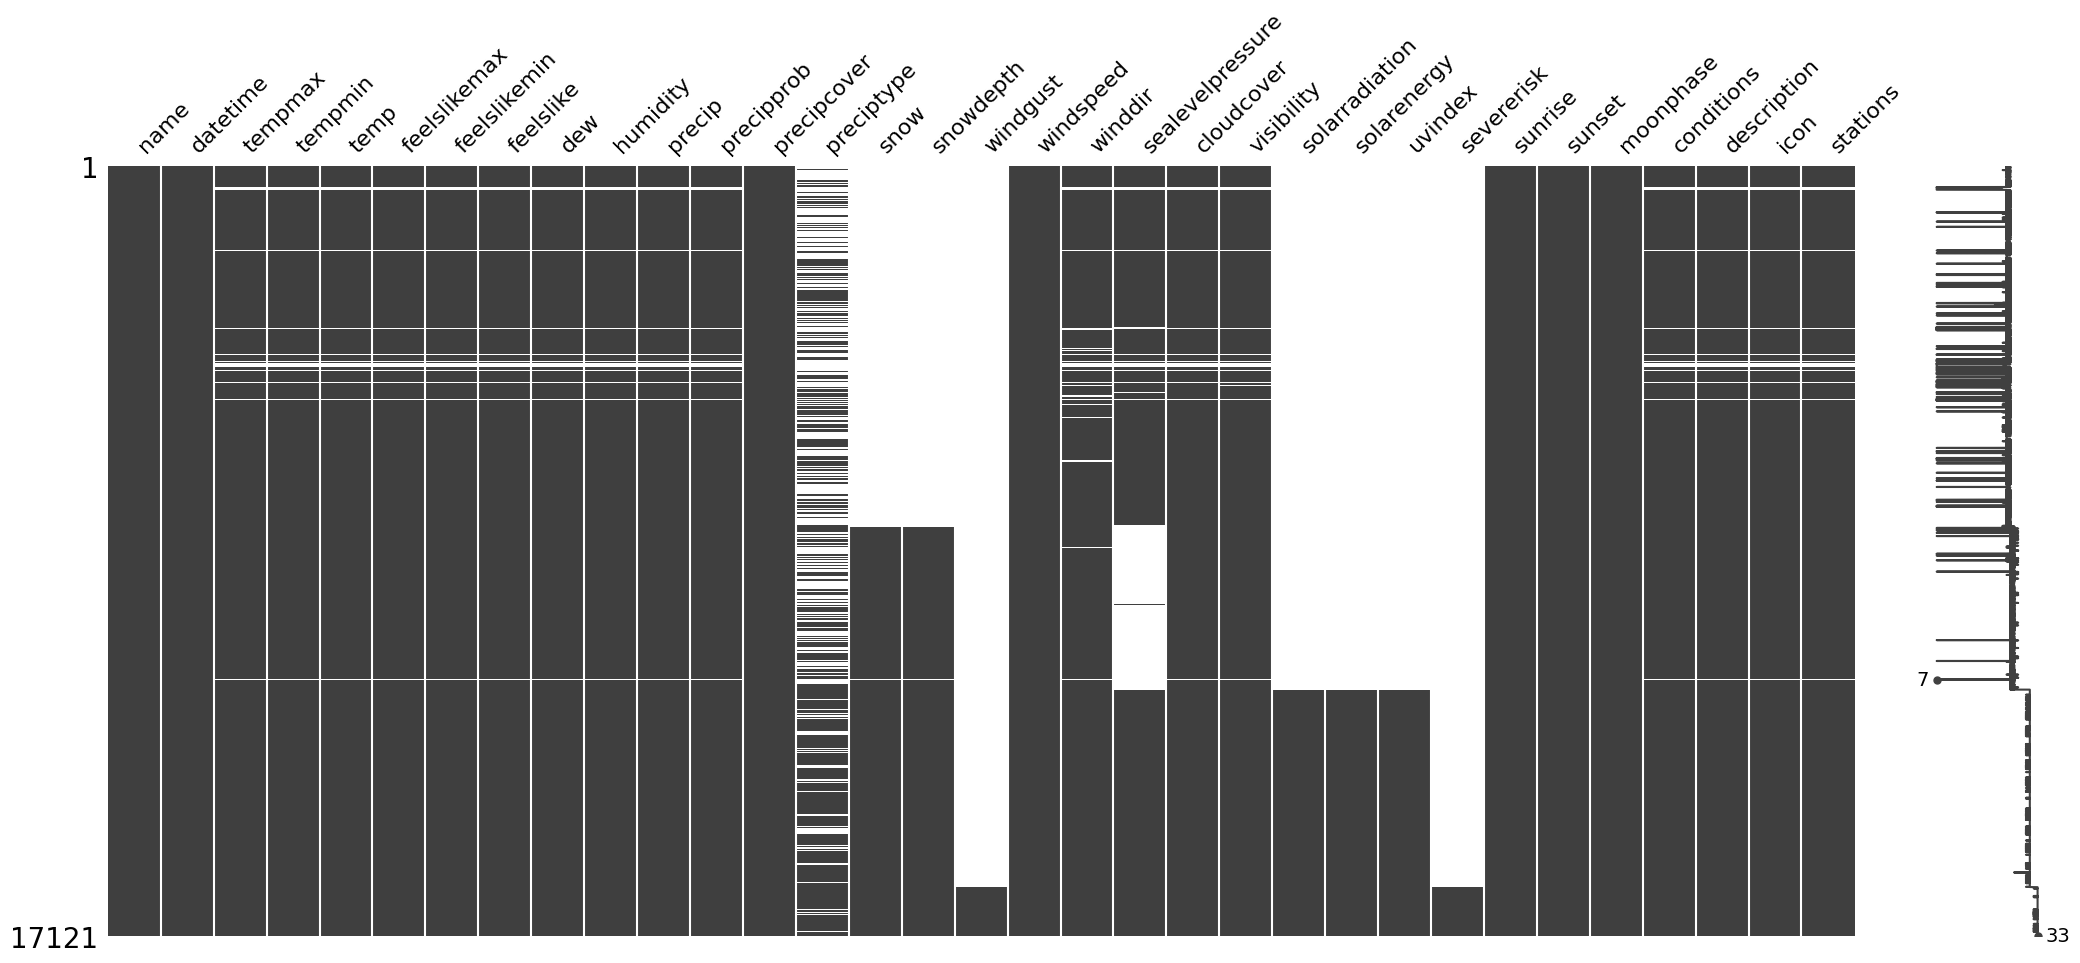

In [9]:
msno.matrix(data3)

In [10]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17121 non-null  object 
 1   datetime          17121 non-null  object 
 2   tempmax           16700 non-null  float64
 3   tempmin           16700 non-null  float64
 4   temp              16700 non-null  float64
 5   feelslikemax      16700 non-null  float64
 6   feelslikemin      16700 non-null  float64
 7   feelslike         16700 non-null  float64
 8   dew               16700 non-null  float64
 9   humidity          16700 non-null  float64
 10  precip            16700 non-null  float64
 11  precipprob        16700 non-null  float64
 12  precipcover       17121 non-null  float64
 13  preciptype        9765 non-null   object 
 14  snow              9089 non-null   float64
 15  snowdepth         9089 non-null   float64
 16  windgust          1087 non-null   float6

In [11]:
data3

name    datetime  tempmax  tempmin  temp  feelslikemax  \
0      Kebumen, Indonesia  1978-02-16     32.1     25.1  28.1          39.3   
1      Kebumen, Indonesia  1978-02-17     31.1     25.1  27.9          37.9   
2      Kebumen, Indonesia  1978-02-18     32.1     26.1  29.0          40.8   
3      Kebumen, Indonesia  1978-02-19     33.1     25.1  28.5          39.4   
4      Kebumen, Indonesia  1978-02-20     31.1     24.1  27.1          44.4   
...                   ...         ...      ...      ...   ...           ...   
17116             Kebumen  2024-12-27     32.7     25.1  28.5          39.5   
17117             Kebumen  2024-12-28     27.8     25.4  26.6          32.5   
17118             Kebumen  2024-12-29     26.2     25.0  25.5          26.2   
17119             Kebumen  2024-12-30     29.6     24.5  26.7          33.6   
17120             Kebumen  2024-12-31     28.4     24.0  26.1          31.7   

       feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0              25.1       31.4  24.8      83.5  ...          NaN      NaN   
1              25.1       31.8  24.9      84.4  ...          NaN      NaN   
2              26.1       33.6  25.5      82.7  ...          NaN      NaN   
3              25.1       32.2  25.1      83.2  ...          NaN      NaN   
4              24.1       30.7  23.1      85.2  ...          NaN      NaN   
...             ...        ...   ...       ...  ...          ...      ...   
17116          25.1       32.2  24.9      81.7  ...         15.6      6.0   
17117          25.4       28.4  23.6      83.9  ...          8.1      6.0   
17118          25.0       25.5  22.5      83.7  ...          3.4      2.0   
17119          24.5       28.2  22.6      78.3  ...         25.8     10.0   
17120          24.0       27.0  23.0      83.5  ...         10.9      6.0   

       severerisk              sunrise               sunset  moonphase  \
0             NaN  1978-02-16T05:45:06  1978-02-16T18:05:40       0.28   
1             NaN  1978-02-17T05:45:14  1978-02-17T18:05:24       0.31   
2             NaN  1978-02-18T05:45:22  1978-02-18T18:05:08       0.34   
3             NaN  1978-02-19T05:45:29  1978-02-19T18:04:50       0.38   
4             NaN  1978-02-20T05:45:35  1978-02-20T18:04:32       0.41   
...           ...                  ...                  ...        ...   
17116        10.0  2024-12-27T05:25:26  2024-12-27T17:59:28       0.88   
17117        30.0  2024-12-28T05:25:57  2024-12-28T17:59:55       0.91   
17118        10.0  2024-12-29T05:26:28  2024-12-29T18:00:22       0.94   
17119        10.0  2024-12-30T05:27:00  2024-12-30T18:00:48       0.98   
17120        10.0  2024-12-31T05:27:31  2024-12-31T18:01:14       0.00   

                   conditions  \
0            Partially cloudy   
1            Partially cloudy   
2            Partially cloudy   
3                    Overcast   
4            Partially cloudy   
...                       ...   
17116        Partially cloudy   
17117          Rain, Overcast   
17118          Rain, Overcast   
17119  Rain, Partially cloudy   
17120          Rain, Overcast   

                                             description               icon  \
0                      Partly cloudy throughout the day.  partly-cloudy-day   
1                      Partly cloudy throughout the day.  partly-cloudy-day   
2                      Partly cloudy throughout the day.  partly-cloudy-day   
3                       Cloudy skies throughout the day.             cloudy   
4                      Partly cloudy throughout the day.  partly-cloudy-day   
...                                                  ...                ...   
17116                  Partly cloudy throughout the day.  partly-cloudy-day   
17117  Cloudy skies throughout the day with a chance ...               rain   
17118  Cloudy skies throughout the day with a chance ...               rain   
17119  Partly cloudy throughout the day with a chance...               

In [12]:
data3['datetime'] = pd.to_datetime(data3['datetime'])

In [13]:
data3.isnull().sum()

name                    0
datetime                0
tempmax               421
tempmin               421
temp                  421
feelslikemax          421
feelslikemin          421
feelslike             421
dew                   421
humidity              421
precip                421
precipprob            421
precipcover             0
preciptype           7356
snow                 8032
snowdepth            8032
windgust            16034
windspeed               0
winddir               714
sealevelpressure     4028
cloudcover            421
visibility            426
solarradiation      11642
solarenergy         11642
uvindex             11642
severerisk          16034
sunrise                 0
sunset                  0
moonphase               0
conditions            421
description           421
icon                  421
stations              421
dtype: int64

# Penyaringan Data

In [14]:
# Pilih kolom yang diinginkan
selected_columns = [
    'datetime',
    'tempmax', 
    'tempmin', 
    'temp',  
    'humidity', 
    'precip', 
    'sealevelpressure',
    'windspeed',
    'winddir',
    'precipprob'
]

# Membuat DataFrame baru hanya dengan kolom yang dipilih
data_filtered = data3[selected_columns]

# Menampilkan DataFrame hasil seleksi
print(data_filtered.head())

    datetime  tempmax  tempmin  temp  humidity  precip  sealevelpressure  \
0 1978-02-16     32.1     25.1  28.1      83.5     0.0            1011.7   
1 1978-02-17     31.1     25.1  27.9      84.4     0.0            1012.5   
2 1978-02-18     32.1     26.1  29.0      82.7     0.0            1013.0   
3 1978-02-19     33.1     25.1  28.5      83.2     0.0            1013.3   
4 1978-02-20     31.1     24.1  27.1      85.2     0.0            1013.6   

   windspeed  winddir  precipprob  
0       18.4    183.2         0.0  
1       18.4    120.5         0.0  
2        9.4     99.7         0.0  
3       14.8    234.8         0.0  
4        5.4    148.1         0.0  


In [15]:
data_filtered

datetime  tempmax  tempmin  temp  humidity  precip  sealevelpressure  \
0     1978-02-16     32.1     25.1  28.1      83.5     0.0            1011.7   
1     1978-02-17     31.1     25.1  27.9      84.4     0.0            1012.5   
2     1978-02-18     32.1     26.1  29.0      82.7     0.0            1013.0   
3     1978-02-19     33.1     25.1  28.5      83.2     0.0            1013.3   
4     1978-02-20     31.1     24.1  27.1      85.2     0.0            1013.6   
...          ...      ...      ...   ...       ...     ...               ...   
17116 2024-12-27     32.7     25.1  28.5      81.7     0.0            1011.5   
17117 2024-12-28     27.8     25.4  26.6      83.9    10.4            1010.7   
17118 2024-12-29     26.2     25.0  25.5      83.7     1.6            1010.6   
17119 2024-12-30     29.6     24.5  26.7      78.3    14.2            1009.7   
17120 2024-12-31     28.4     24.0  26.1      83.5    14.5            1008.8   

       windspeed  winddir  precipprob  
0           18.4    183.2         0.0  
1           18.4    120.5         0.0  
2            9.4     99.7         0.0  
3           14.8    234.8         0.0  
4            5.4    148.1         0.0  
...          ...      ...         ...  
17116       11.2    249.3         0.0  
17117       10.8    290.6       100.0  
17118        7.6    274.1       100.0  
17119       23.8    266.0       100.0  
17120       26.3    282.0       100.0  

[17121 rows x 10 columns]

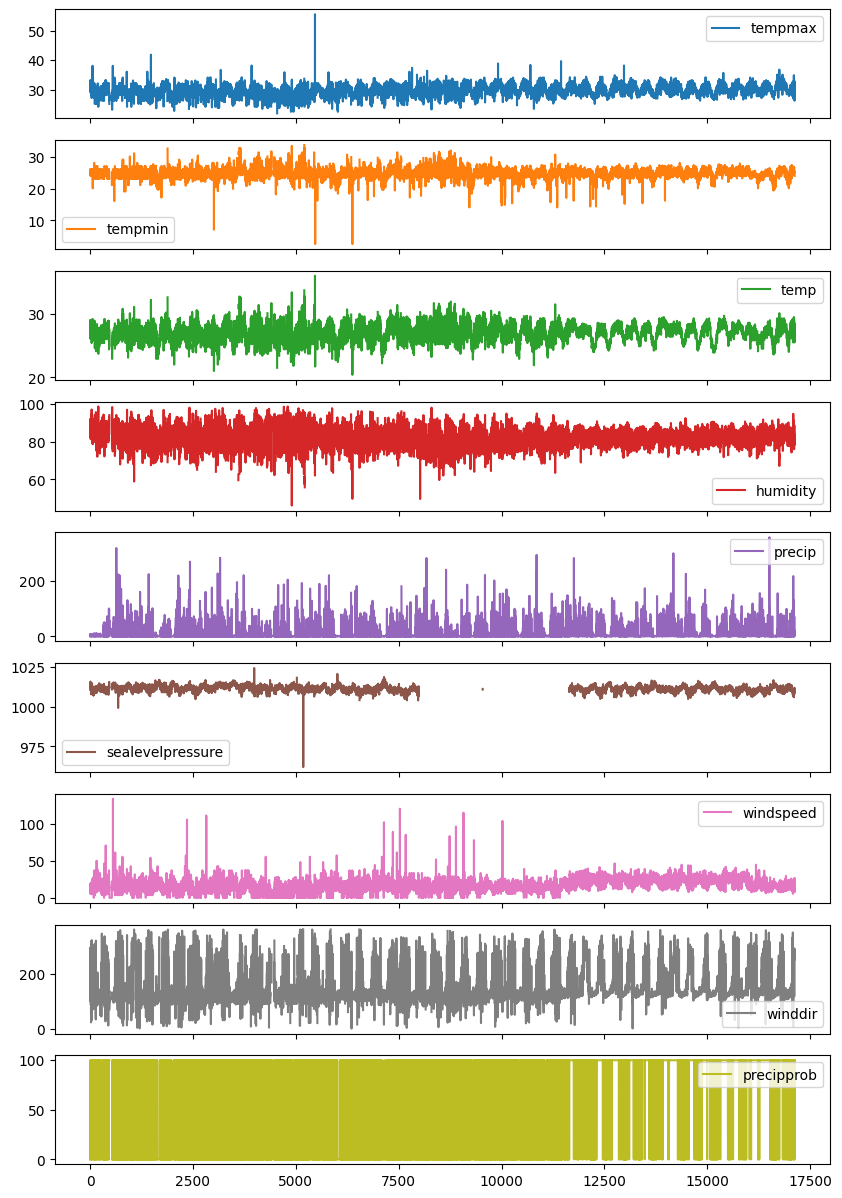

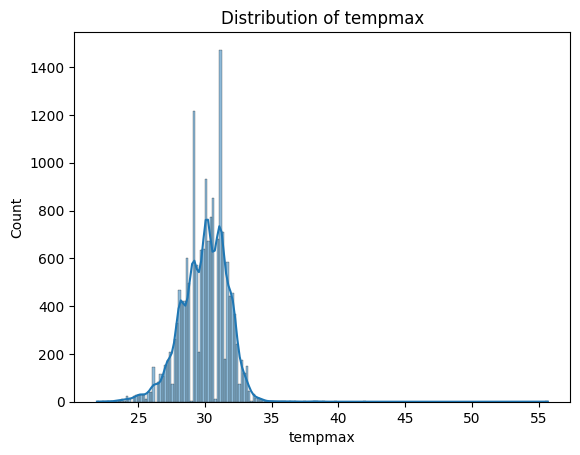

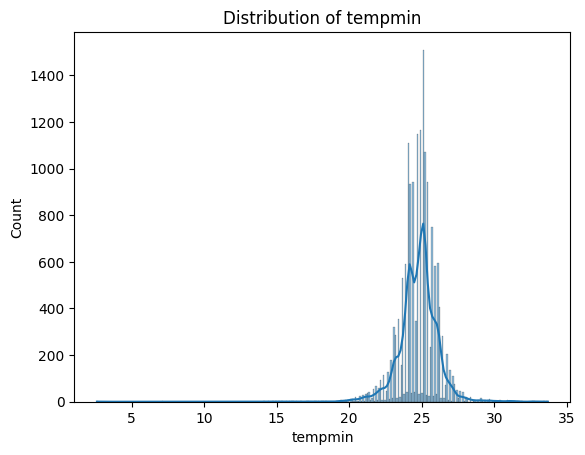

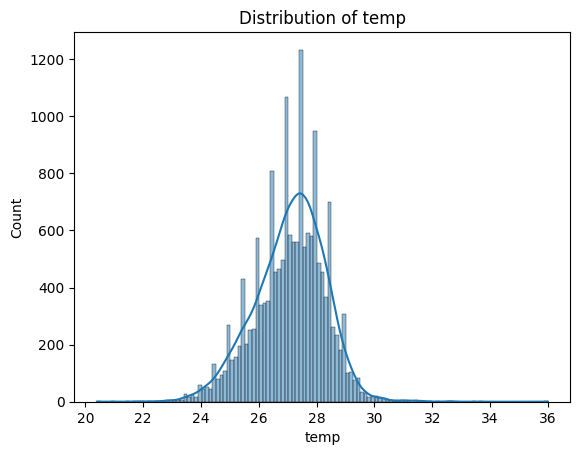

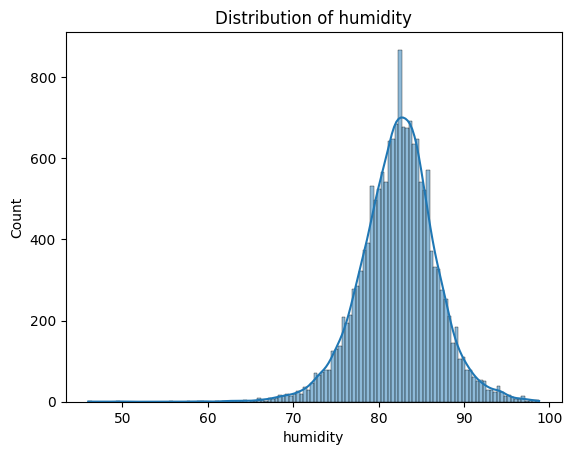

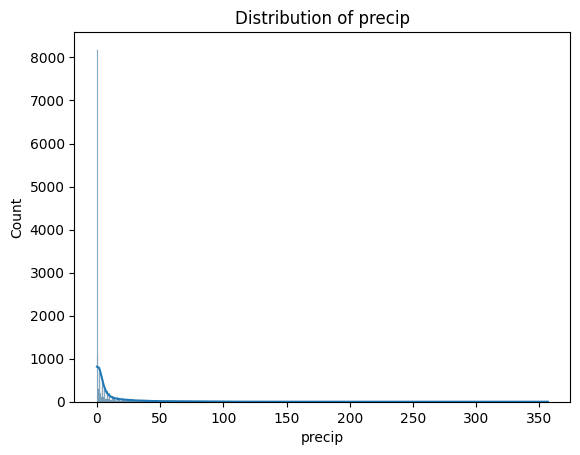

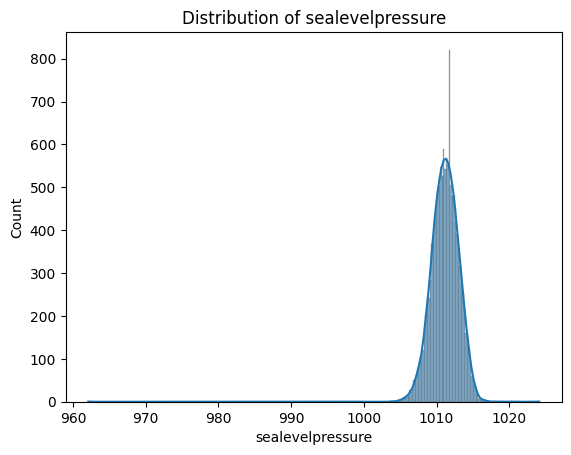

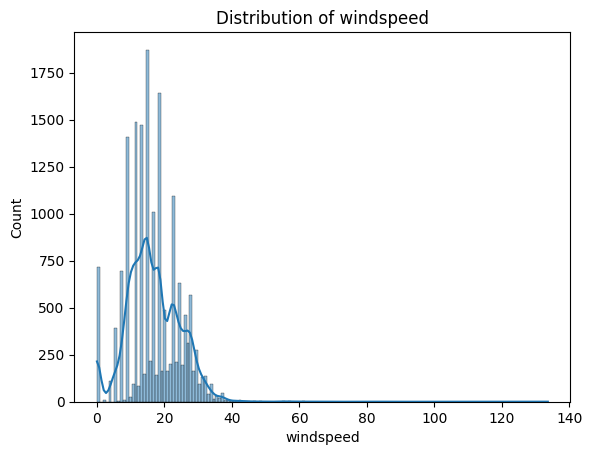

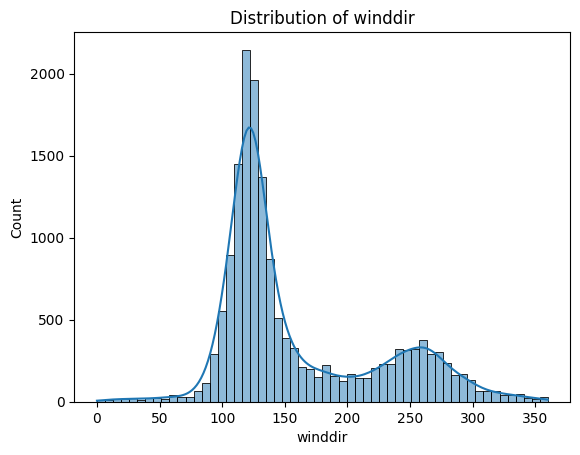

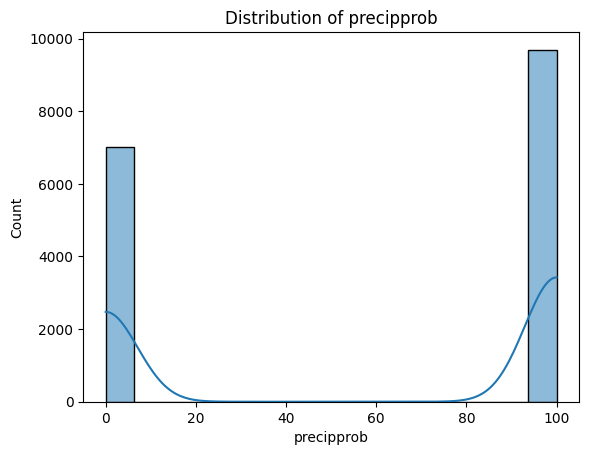

In [16]:
data_filtered.plot(
    y=[
    'tempmax', 
    'tempmin', 
    'temp',  
    'humidity', 
    'precip', 
    'sealevelpressure',
    'windspeed',
    'winddir',
    'precipprob'
    ],
    subplots=True, figsize=(10, 15))
plt.show()

for column in ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'sealevelpressure', 'windspeed', 'winddir', 'precipprob']:
    sns.histplot(data_filtered[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Pembersihan Data - Bagian Null Value

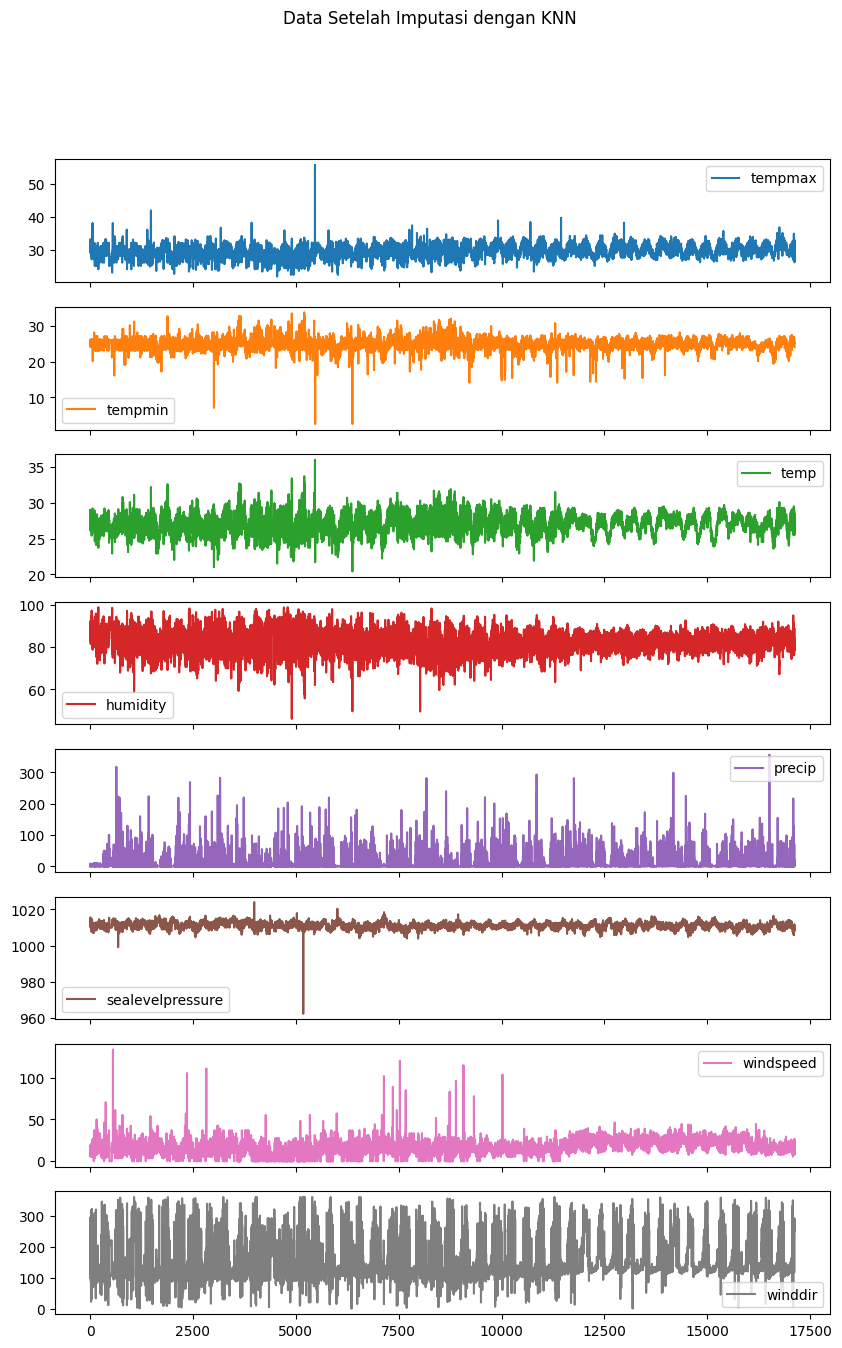

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Daftar kolom yang akan digunakan
columns_to_clean = [
    'tempmax', 
    'tempmin', 
    'temp',  
    'humidity', 
    'precip', 
    'sealevelpressure',
    'windspeed',
    'winddir'
]

# Inisialisasi KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")  # Menggunakan 5 tetangga terdekat

# Mengganti NaN dengan KNN Imputer dan menyimpan hasil ke DataFrame baru
data3_cleaned = data_filtered.copy()
data3_cleaned[columns_to_clean] = knn_imputer.fit_transform(data_filtered[columns_to_clean])

# Visualisasi data setelah menggantikan NaN
data3_cleaned.plot(
    y=columns_to_clean,
    subplots=True,
    figsize=(10, 15),
    title='Data Setelah Imputasi dengan KNN'
)
plt.show()


In [18]:
# Mengganti nilai NaN di kolom 'precipprob' dengan 0
data3_cleaned['precipprob'] = data3_cleaned['precipprob'].fillna(0)

In [19]:
data3_cleaned.isnull().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
humidity            0
precip              0
sealevelpressure    0
windspeed           0
winddir             0
precipprob          0
dtype: int64

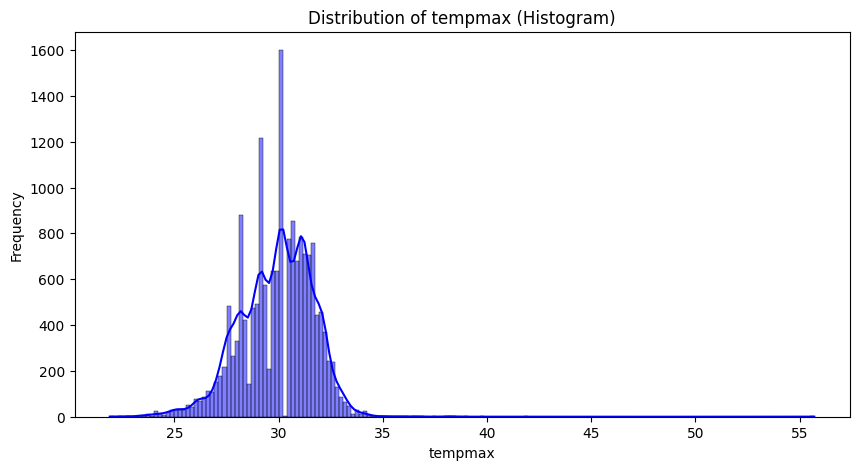

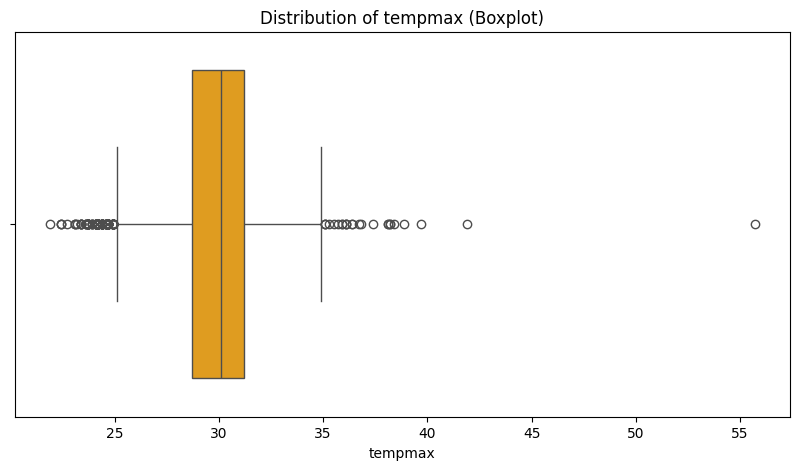

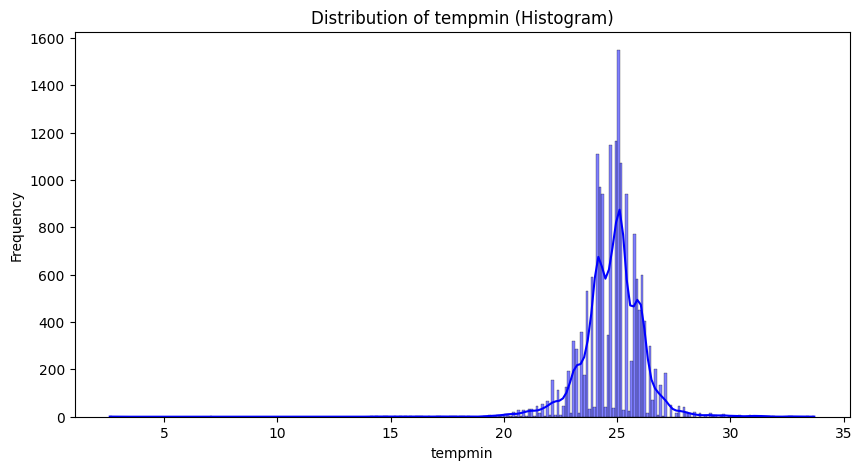

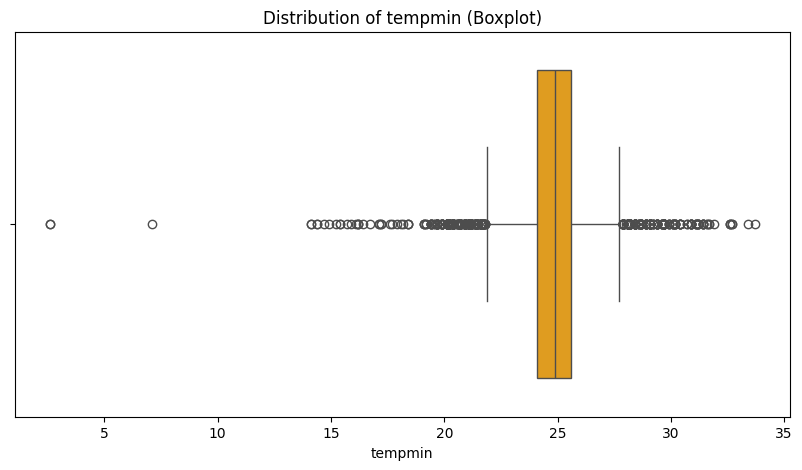

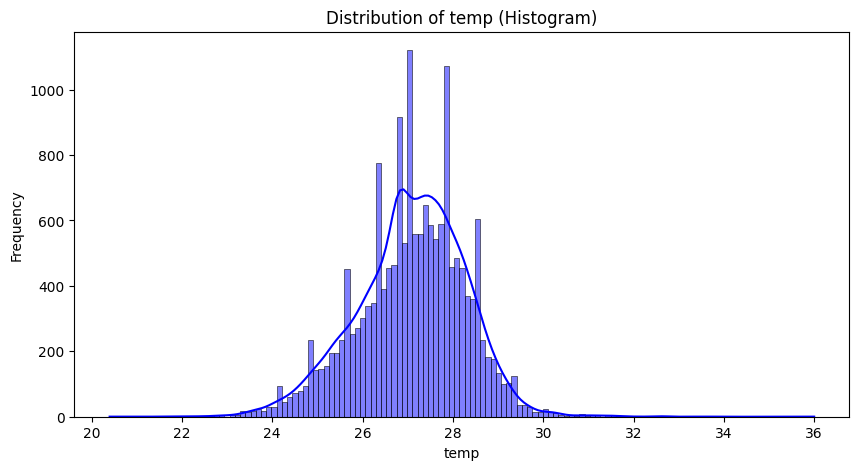

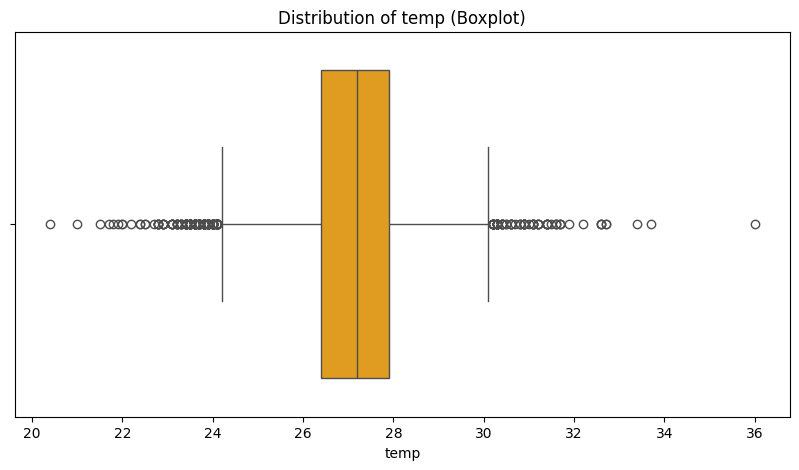

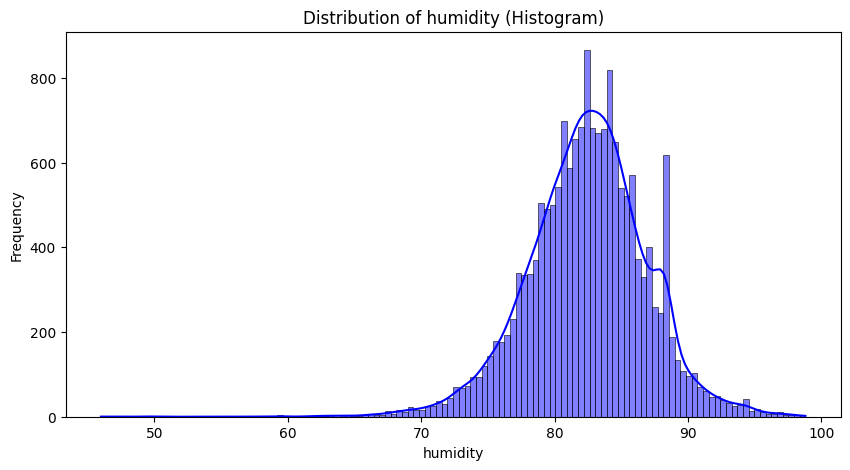

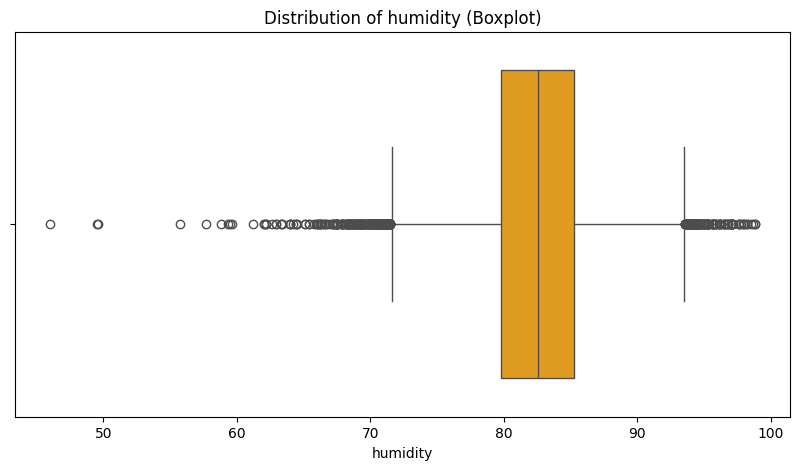

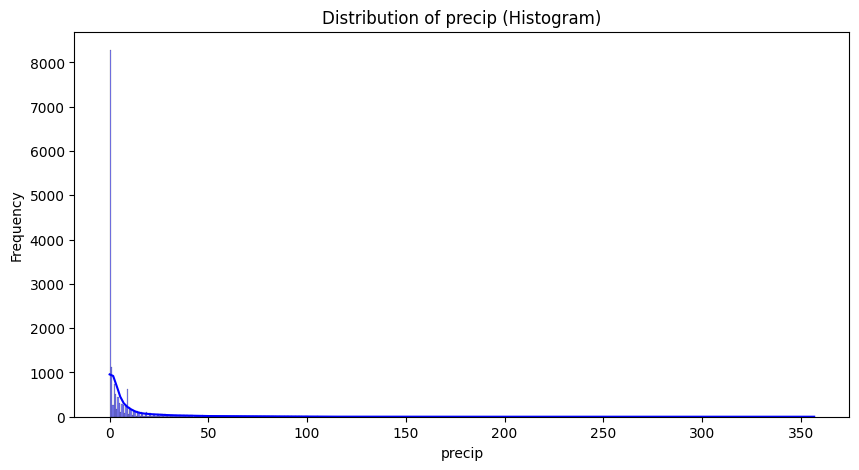

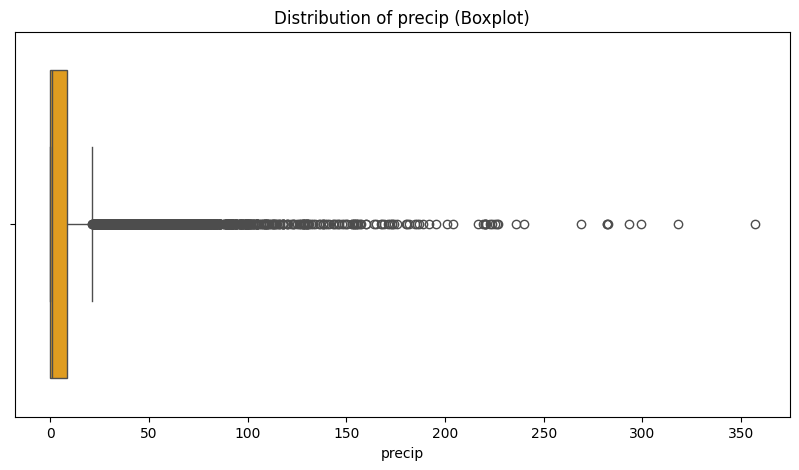

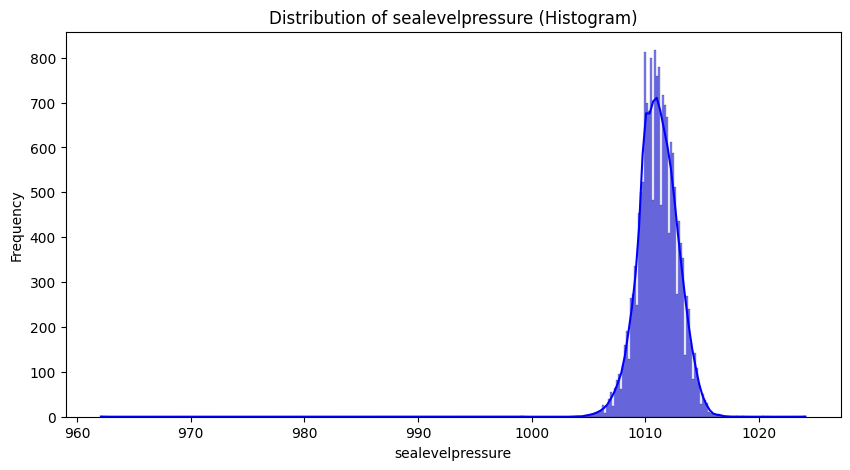

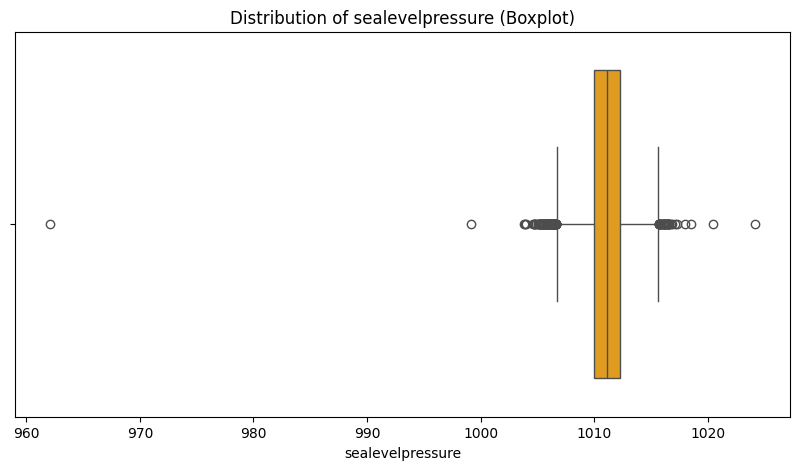

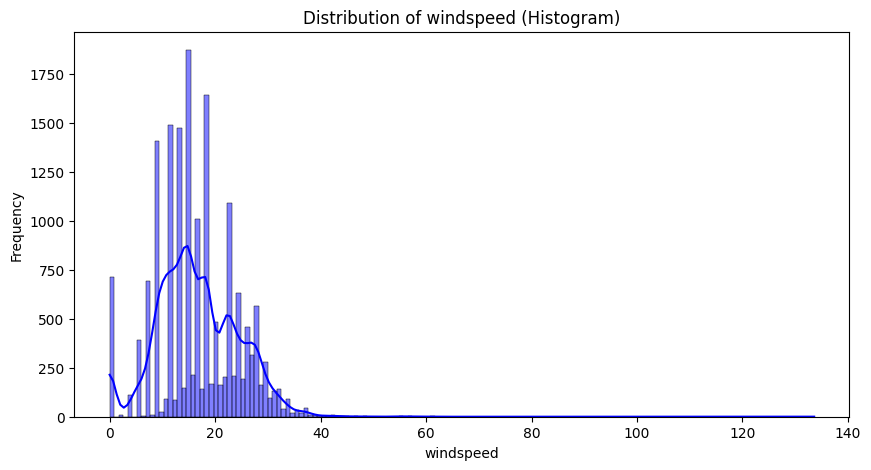

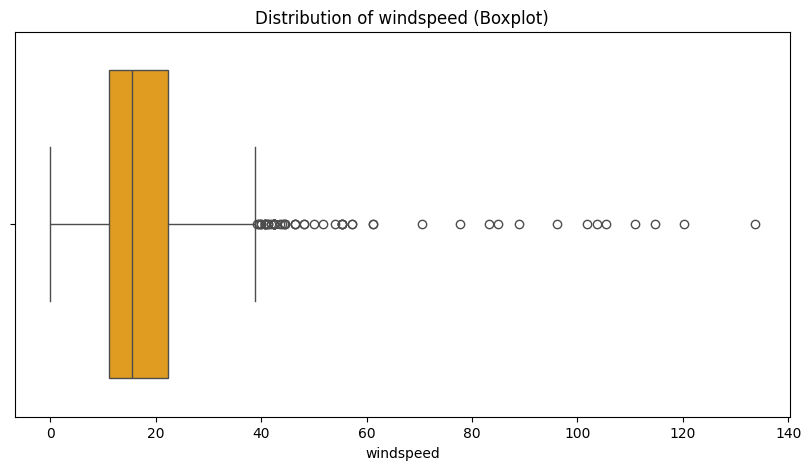

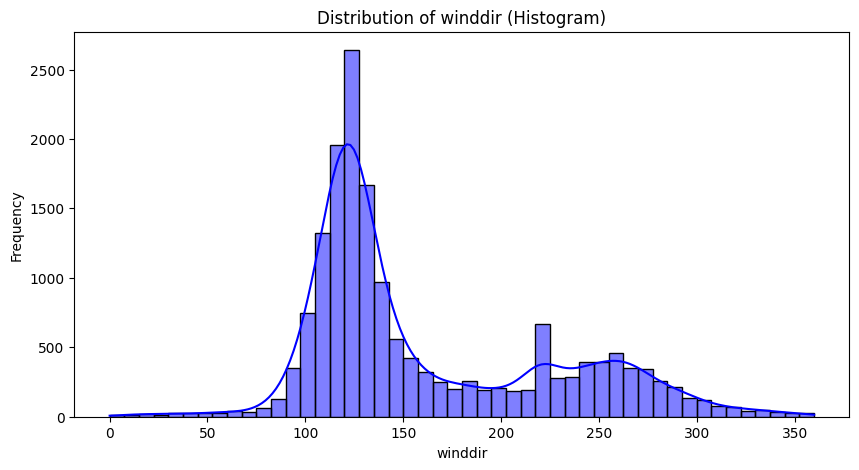

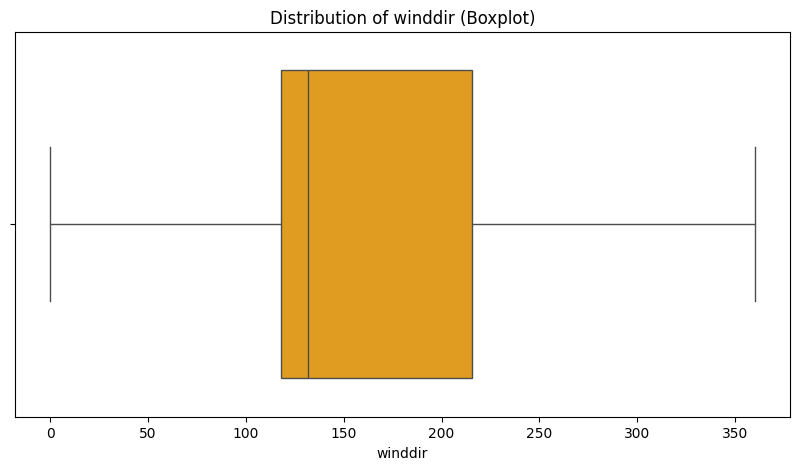

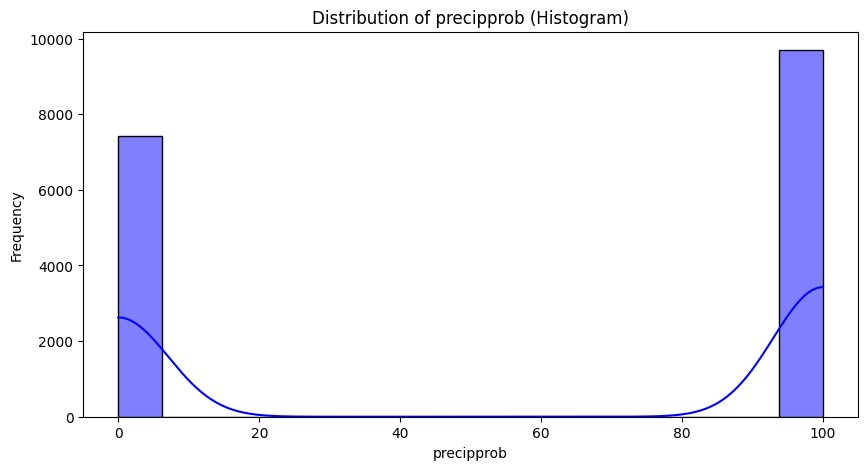

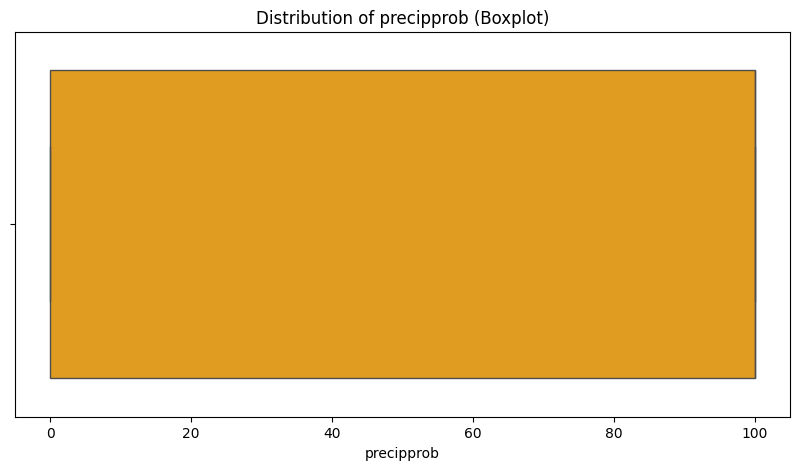

In [20]:
# Daftar kolom yang akan divisualisasikan
columns = ['tempmax', 'tempmin', 'temp',  'humidity', 'precip', 
           'sealevelpressure', 'windspeed', 'winddir', 'precipprob']

# Loop untuk membuat histogram dan boxplot
for column in columns:
    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(data3_cleaned[column], kde=True, color='blue')
    plt.title(f'Distribution of {column} (Histogram)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data3_cleaned[column], color='orange')
    plt.title(f'Distribution of {column} (Boxplot)')
    plt.xlabel(column)
    plt.show()

# Pembersihan Data - Bagian Outliers 

In [21]:
import numpy as np
import pandas as pd

# Salin data asli
data_fix = data3_cleaned.copy()

# Daftar kolom yang akan dibersihkan dari outlier
columns_to_clean = [
    'tempmax', 
    'tempmin', 
    'temp', 
    'humidity',                 
    'sealevelpressure', 
    'windspeed'
]

# Fungsi untuk mengganti outlier menggunakan IQR
def replace_outliers_with_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil 1
    Q3 = df[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas

    # Identifikasi outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Ganti outliers dengan median kolom
    median_value = df[column].median()
    df.loc[outliers, column] = median_value

# Terapkan IQR pada setiap kolom dalam daftar
for column in columns_to_clean:
    replace_outliers_with_iqr(data_fix, column)

# Tampilkan data yang telah dibersihkan
print("Data setelah menggantikan outliers menggunakan IQR:")
print(data_fix.head(10))


Data setelah menggantikan outliers menggunakan IQR:
    datetime  tempmax  tempmin  temp  humidity  precip  sealevelpressure  \
0 1978-02-16     32.1     25.1  28.1      83.5     0.0            1011.7   
1 1978-02-17     31.1     25.1  27.9      84.4     0.0            1012.5   
2 1978-02-18     32.1     26.1  29.0      82.7     0.0            1013.0   
3 1978-02-19     33.1     25.1  28.5      83.2     0.0            1013.3   
4 1978-02-20     31.1     24.1  27.1      85.2     0.0            1013.6   
5 1978-02-21     30.1     24.1  26.1      92.2     0.0            1013.7   
6 1978-02-22     31.1     24.1  27.4      89.7     0.0            1012.7   
7 1978-02-23     29.1     24.1  27.0      87.8     9.0            1013.3   
8 1978-02-24     32.1     25.1  27.0      87.7     0.0            1014.1   
9 1978-02-25     33.1     24.1  27.8      83.0     0.0            1015.6   

   windspeed  winddir  precipprob  
0       18.4    183.2         0.0  
1       18.4    120.5         0.0  
2  

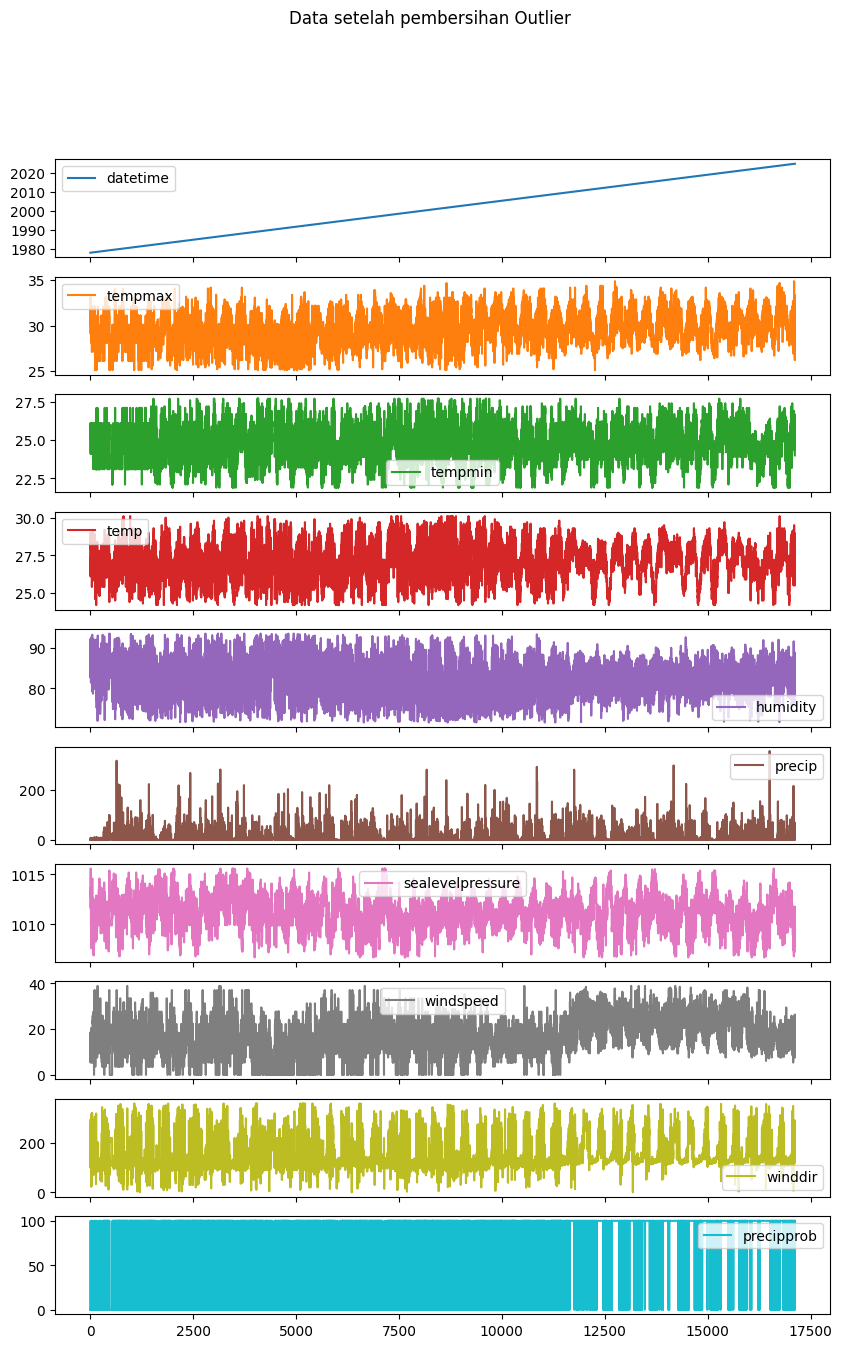

In [22]:
# Visualisasi data setelah menggantikan NaN
data_fix.plot(
    subplots=True,
    figsize=(10, 15),
    title='Data setelah pembersihan Outlier'
)
plt.show()

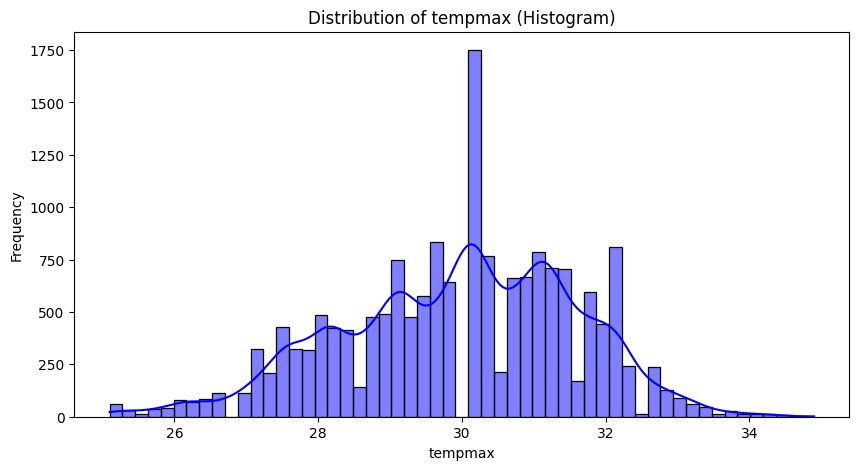

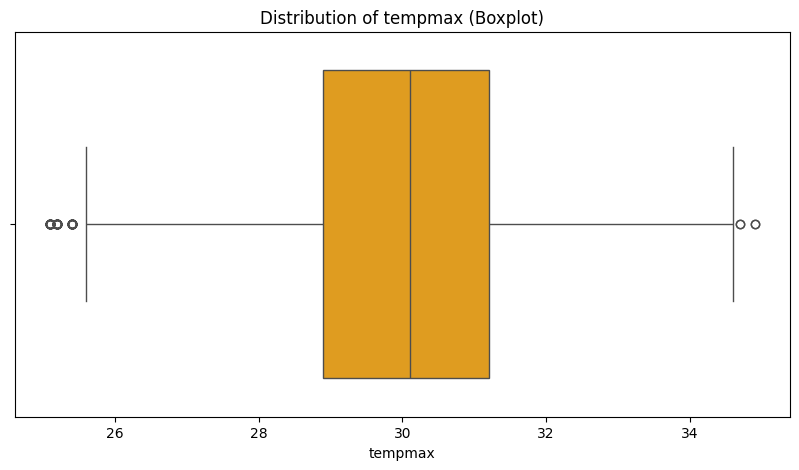

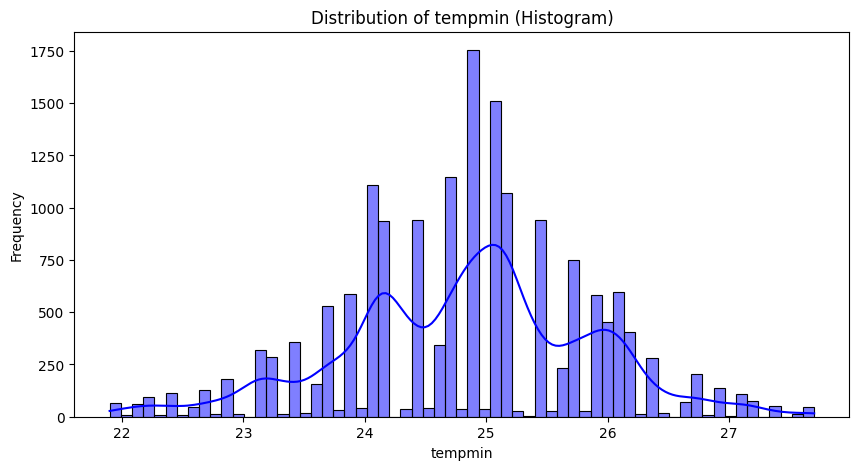

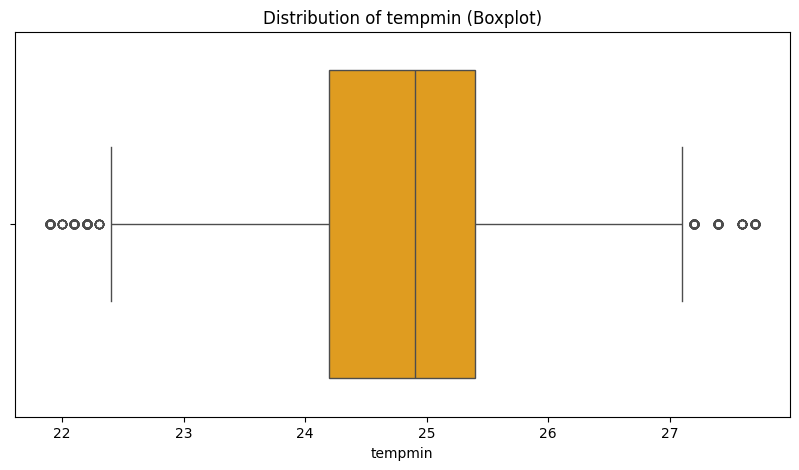

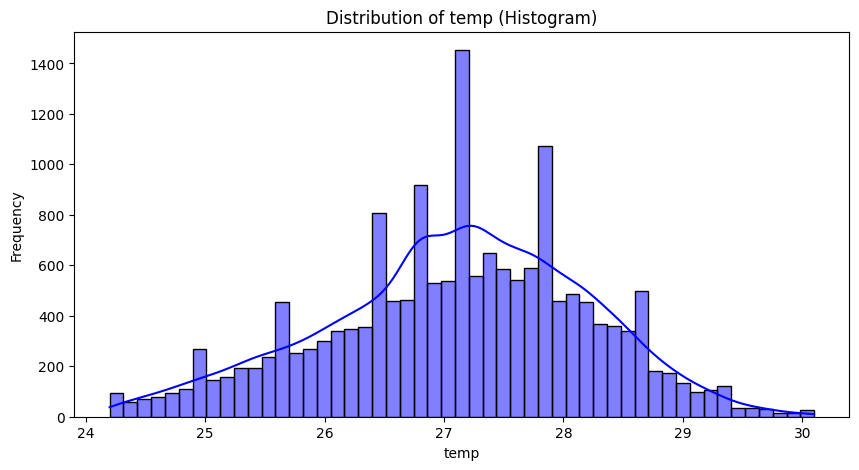

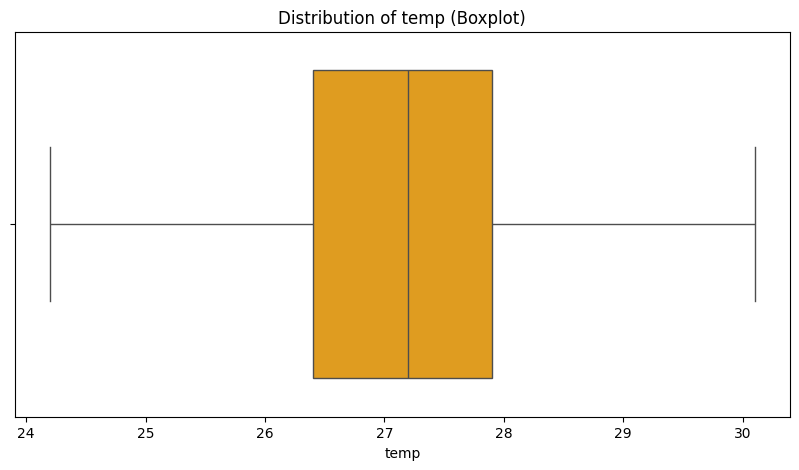

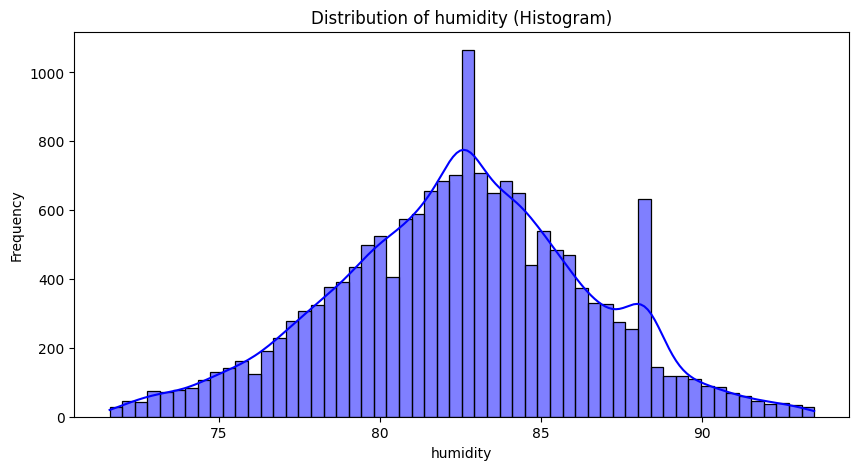

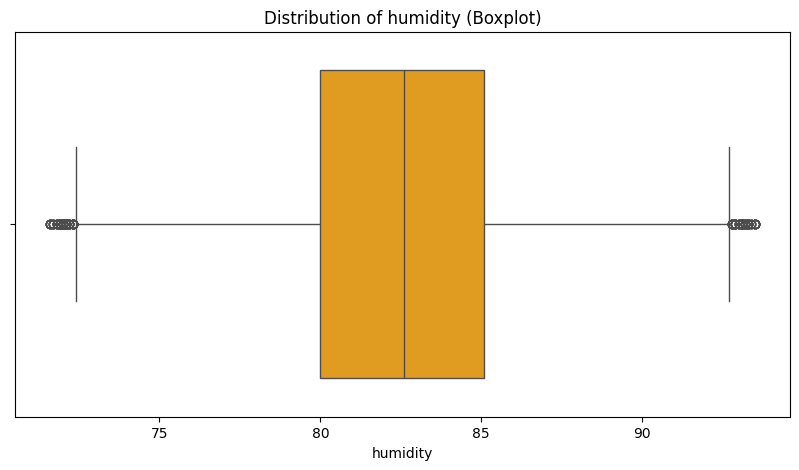

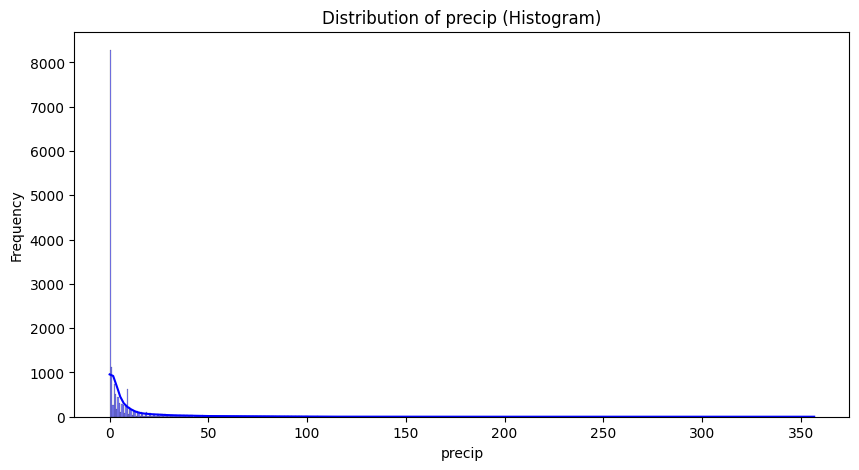

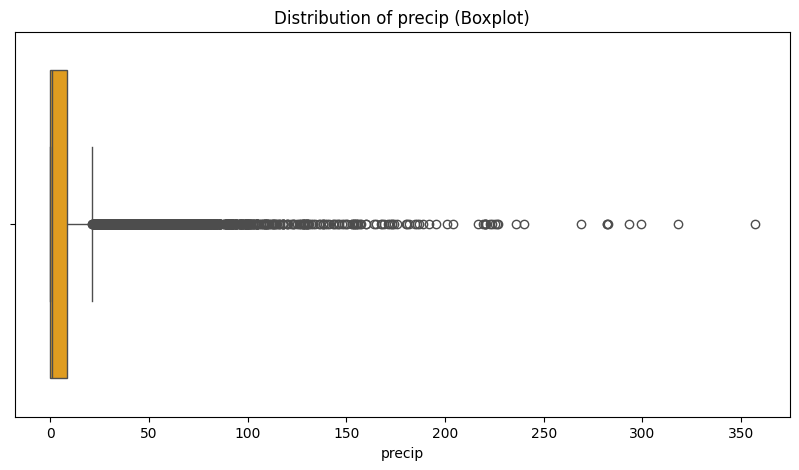

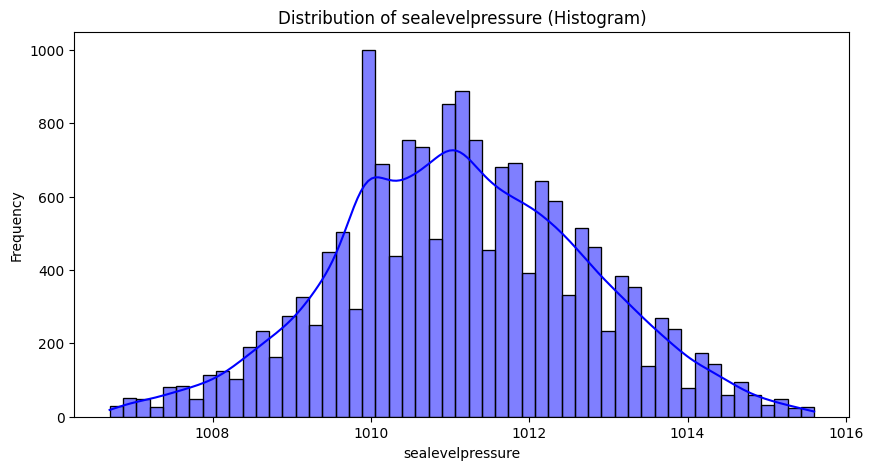

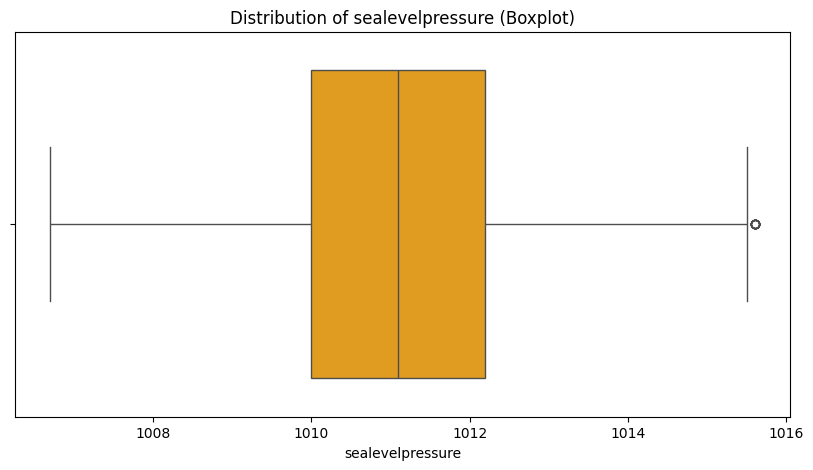

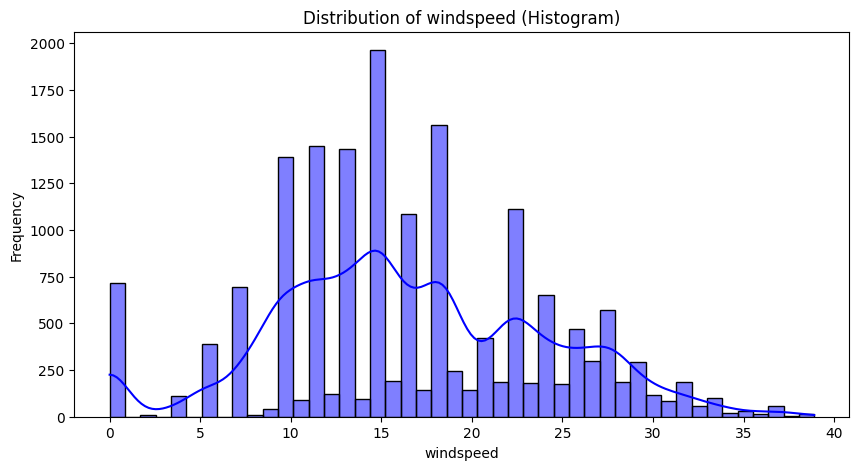

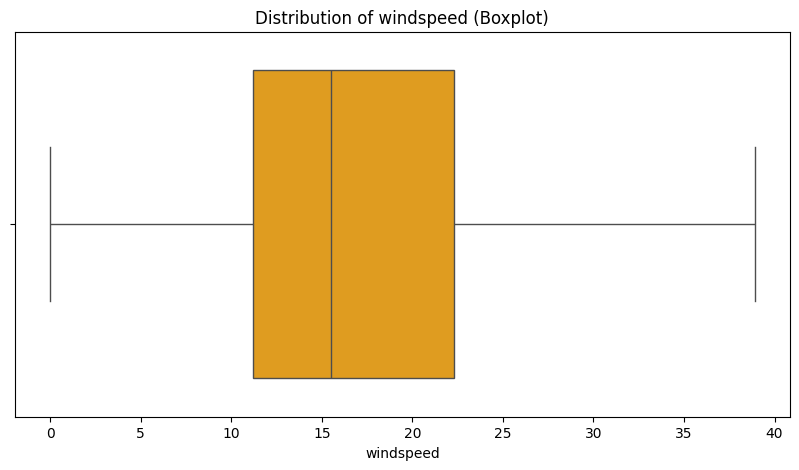

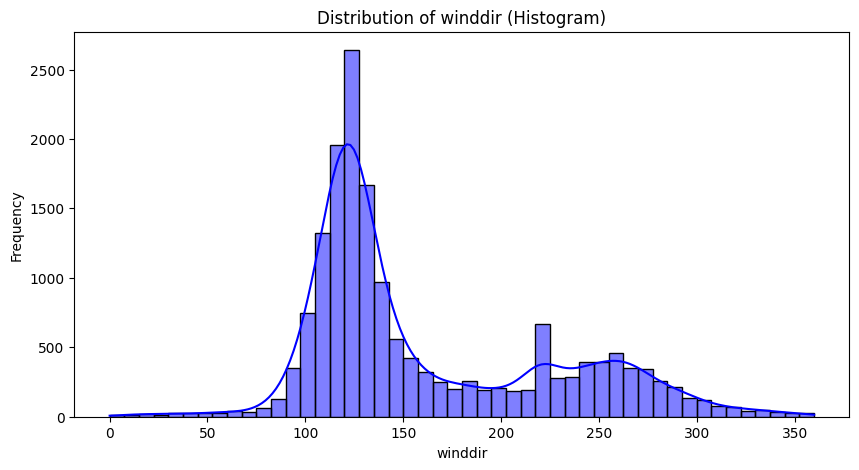

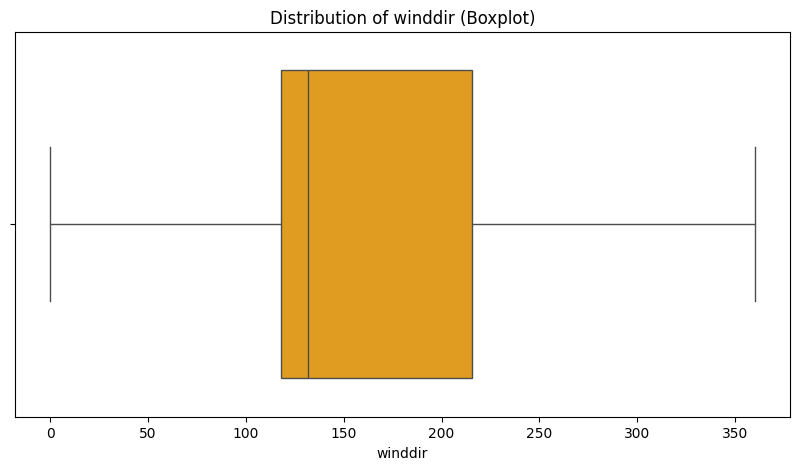

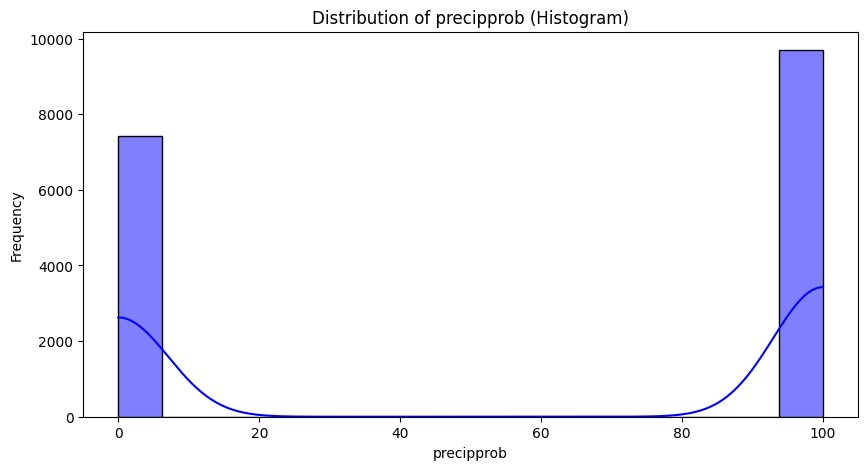

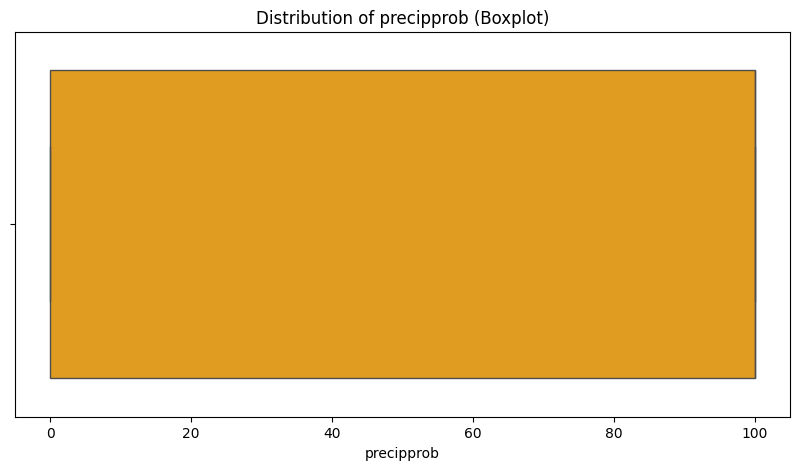

In [23]:
# Daftar kolom yang akan divisualisasikan
columns = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 
           'sealevelpressure', 'windspeed', 'winddir', 'precipprob']

# Loop untuk membuat histogram dan boxplot
for column in columns:
    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(data_fix[column], kde=True, color='blue')
    plt.title(f'Distribution of {column} (Histogram)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data_fix[column], color='orange')
    plt.title(f'Distribution of {column} (Boxplot)')
    plt.xlabel(column)
    plt.show()

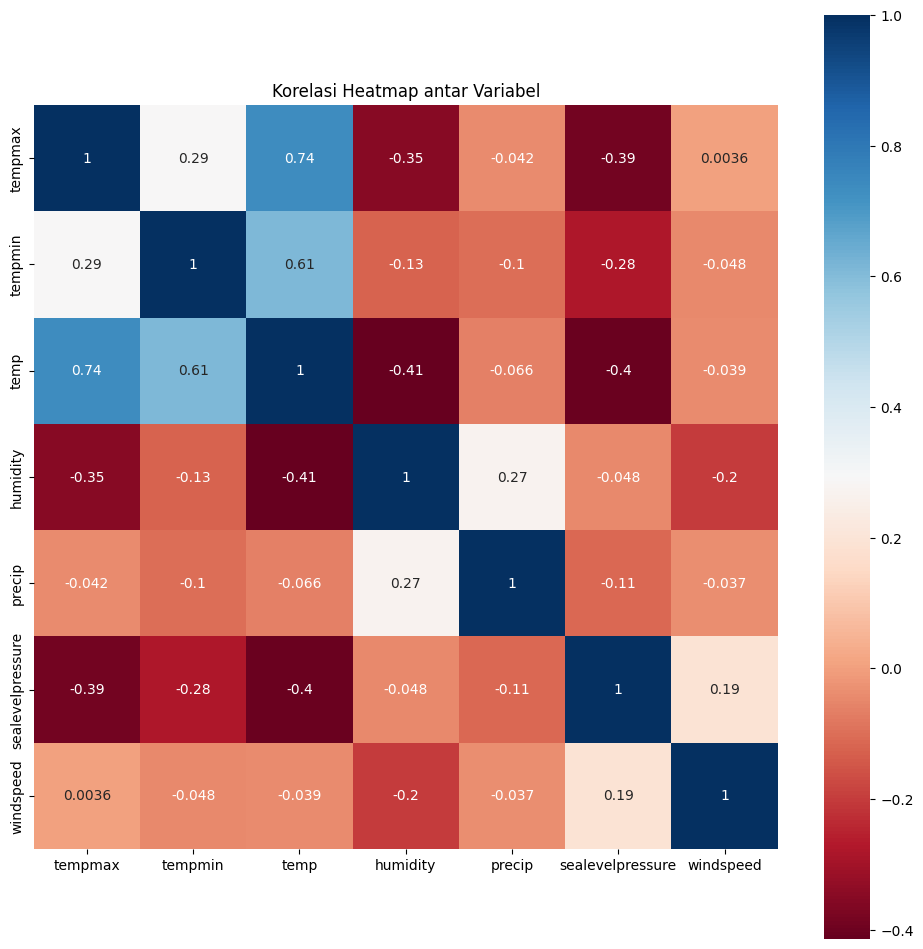

In [24]:
# Memilih hanya kolom yang diinginkan
selected_columns = [
    'tempmax', 
    'tempmin', 
    'temp',  
    'humidity', 
    'precip', 
    'sealevelpressure',
    'windspeed'

]

# Menghitung matriks korelasi hanya untuk kolom yang dipilih
corrmat = data_fix[selected_columns].corr()

# Menentukan palet warna untuk heatmap
cmap = sns.color_palette("RdBu", as_cmap=True)

# Membuat heatmap dengan ukuran yang sesuai
plt.figure(figsize=(12,12))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)
plt.title('Korelasi Heatmap antar Variabel')
plt.show()

# Data Preproses - Membuat Target (Y)

In [25]:
# Rename the column 'precipprob' to 'precipToday'
data_fix.rename(columns={'precipprob': 'precipToday'}, inplace=True)

In [26]:
# Menambahkan kolom klasifikasi precip
def classify_precip(value):
    if 0 <= value <=0.1:
        return 'No Rain'
    elif 0.1 <= value <= 19.9:
        return 'Light'
    elif 20.0 <= value <= 49.9:
        return 'Medium'
    elif 50.0 <= value <= 99.9:
        return 'Heavy'
    elif value >= 100.0:
        return 'Extrem'
    else:
        return 'Unknown'  # Untuk nilai yang tidak masuk dalam range

# Terapkan klasifikasi ke kolom precip
data_fix['precip_class_Today'] = data_fix['precip'].apply(classify_precip)

### Penggeseran Kolom biner hujan

In [27]:
# Geser kolom
data_fix['precipTomorrow'] = data_fix['precipToday'].shift(-1)

# Isi nilai NaN dengan median
fill_value = data_fix['precipToday'].median()
data_fix['precipTomorrow']= data_fix['precipTomorrow'].fillna(fill_value)

In [28]:
# Geser kolom
data_fix['precip_class_Tomorrow'] = data_fix['precip_class_Today'].shift(-1)

data_fix['precip_class_Tomorrow']= data_fix['precip_class_Tomorrow'].fillna('No Rain')

<Axes: xlabel='precip_class_Today', ylabel='count'>

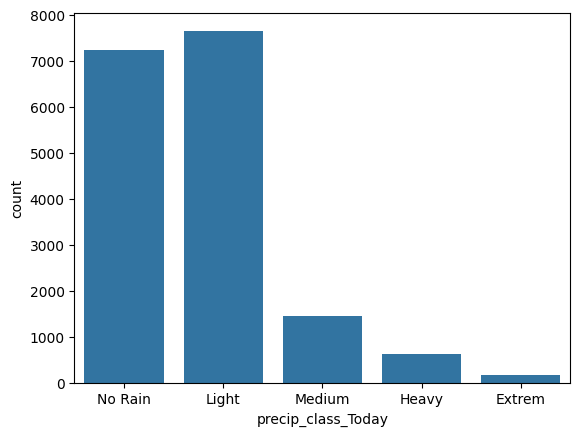

In [29]:
sns.countplot(x=data_fix["precip_class_Today"])

<Axes: xlabel='precipToday', ylabel='count'>

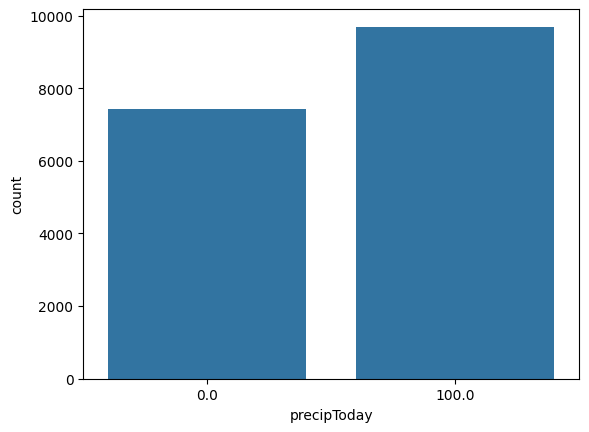

In [30]:
sns.countplot(x= data_fix["precipToday"])

<Axes: xlabel='precip_class_Tomorrow', ylabel='count'>

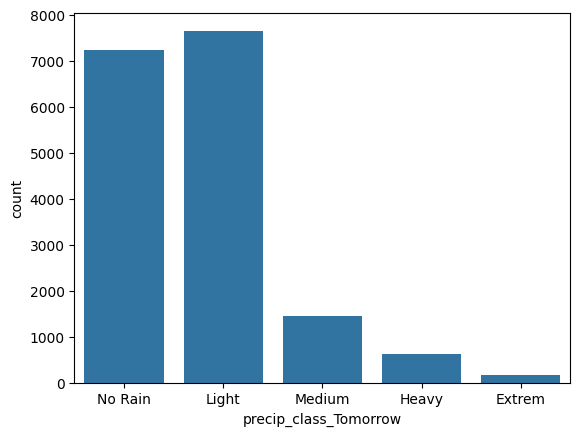

In [31]:
sns.countplot(x=data_fix["precip_class_Tomorrow"])

<Axes: xlabel='precipTomorrow', ylabel='count'>

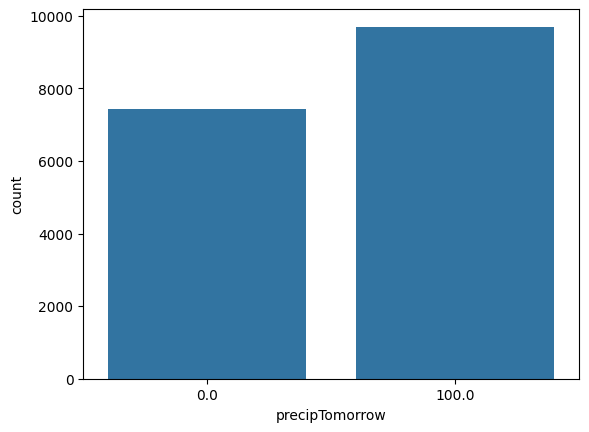

In [32]:
sns.countplot(x= data_fix["precipTomorrow"])

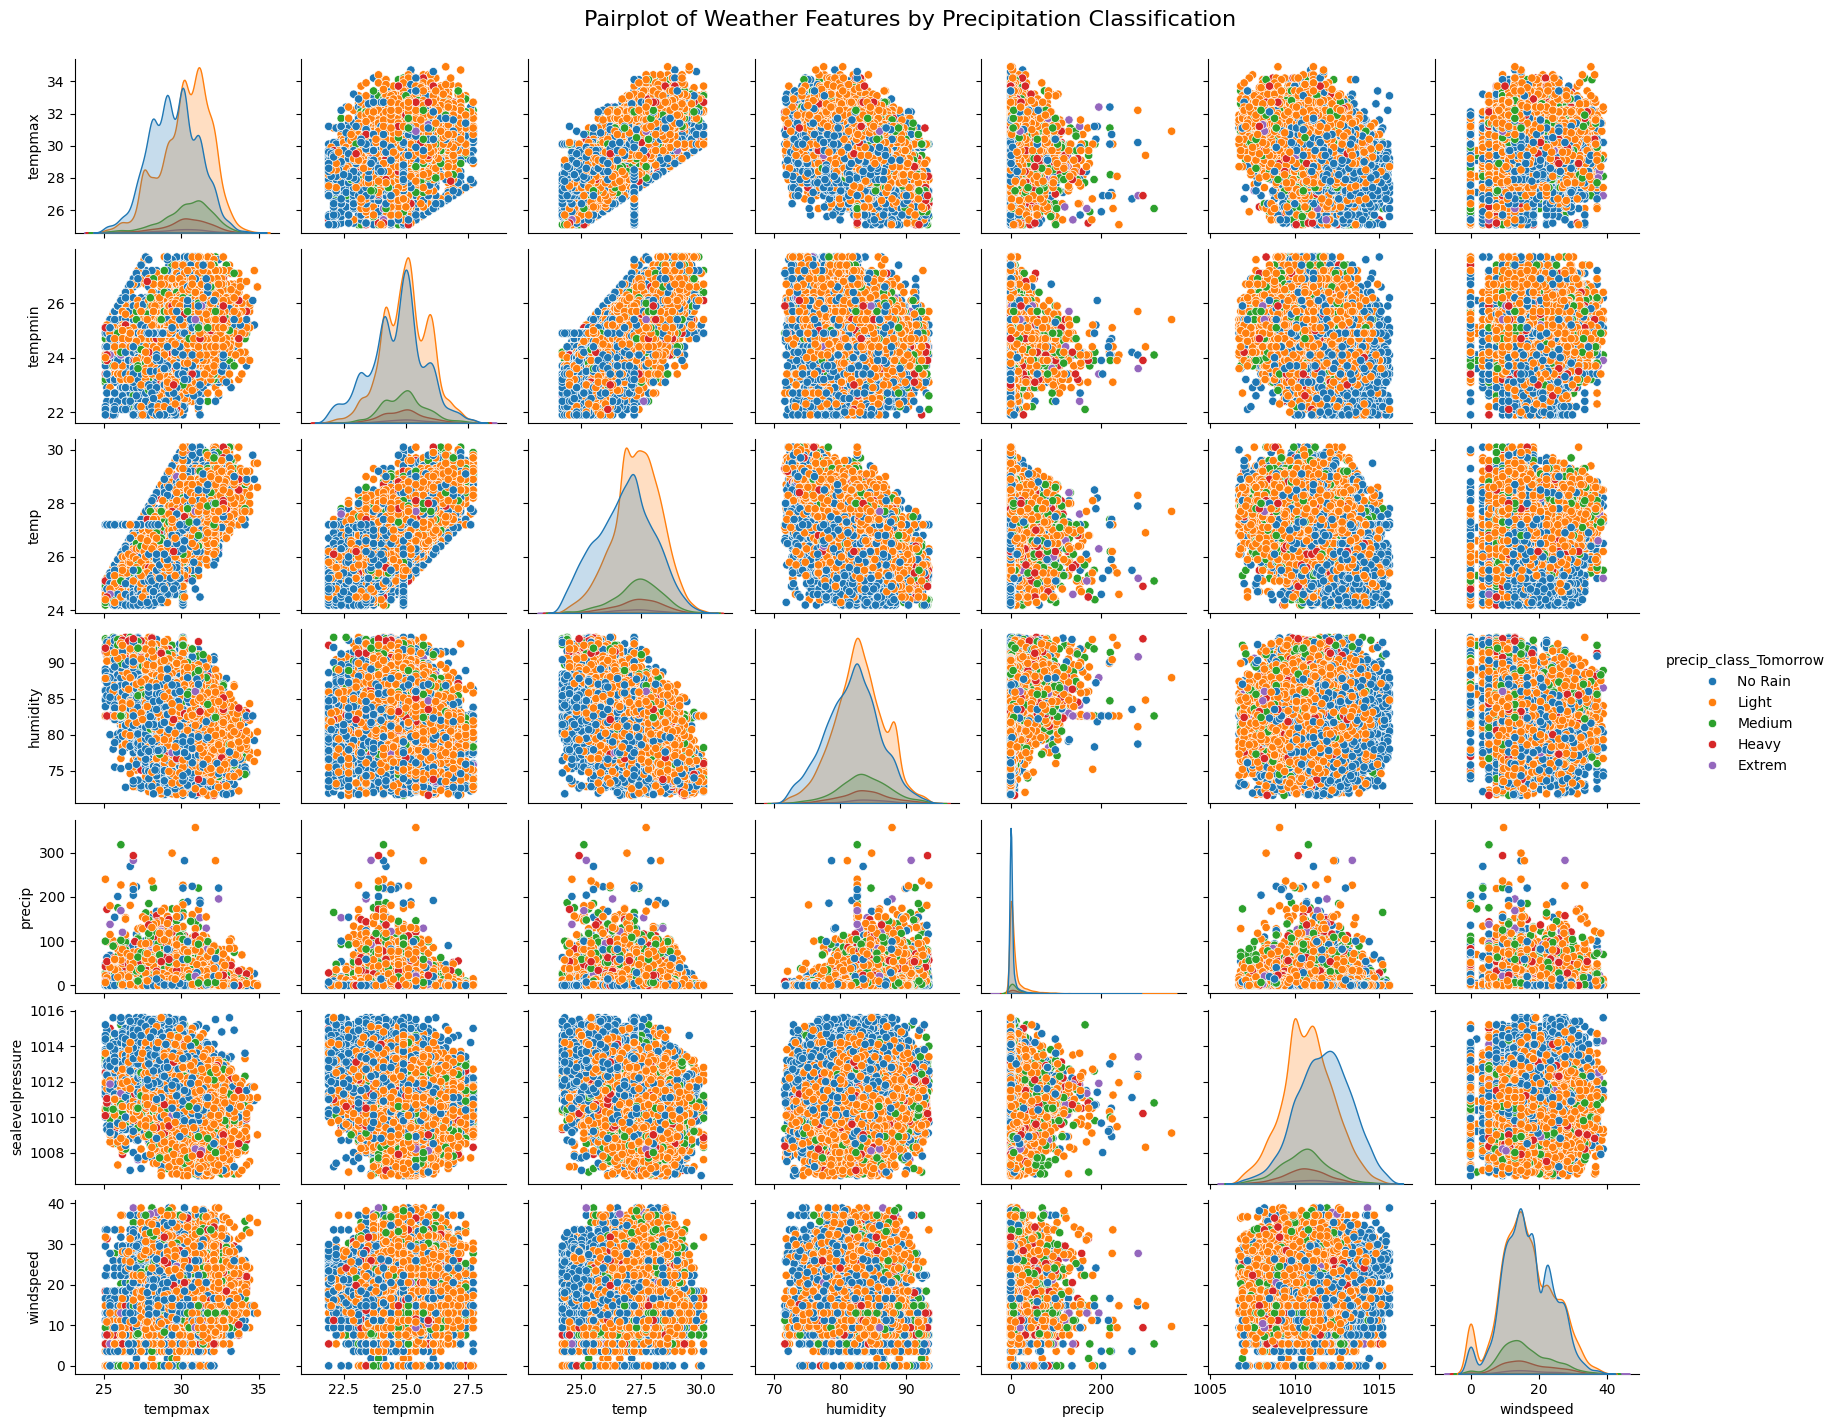

In [33]:

# Membuat pairplot dengan palet warna dan penyesuaian lainnya
pairplot = sns.pairplot(
    data=data_fix,
    vars=[
        'tempmax', 
        'tempmin', 
        'temp', 
        'humidity', 
        'precip',
        'sealevelpressure',
        'windspeed'
    ],
    hue='precip_class_Tomorrow',  # Warna berdasarkan kategori precipprob
    diag_kind="kde",  # Kernel Density Estimation untuk distribusi diagonal
    height=2,  # Ukuran setiap plot
    aspect=1.2  # Rasio panjang-lebar plot
)

# Menambahkan judul untuk keseluruhan grafik
pairplot.fig.suptitle(
    "Pairplot of Weather Features by Precipitation Classification",
    y=1.02,  # Penyesuaian jarak dari grafik ke judul
    fontsize=16
)

# Menampilkan grafik
plt.savefig("Pairplot_Features.jpg")
plt.show()

In [34]:
data_fix

datetime  tempmax  tempmin  temp  humidity  precip  sealevelpressure  \
0     1978-02-16     32.1     25.1  28.1      83.5     0.0            1011.7   
1     1978-02-17     31.1     25.1  27.9      84.4     0.0            1012.5   
2     1978-02-18     32.1     26.1  29.0      82.7     0.0            1013.0   
3     1978-02-19     33.1     25.1  28.5      83.2     0.0            1013.3   
4     1978-02-20     31.1     24.1  27.1      85.2     0.0            1013.6   
...          ...      ...      ...   ...       ...     ...               ...   
17116 2024-12-27     32.7     25.1  28.5      81.7     0.0            1011.5   
17117 2024-12-28     27.8     25.4  26.6      83.9    10.4            1010.7   
17118 2024-12-29     26.2     25.0  25.5      83.7     1.6            1010.6   
17119 2024-12-30     29.6     24.5  26.7      78.3    14.2            1009.7   
17120 2024-12-31     28.4     24.0  26.1      83.5    14.5            1008.8   

       windspeed  winddir  precipToday precip_class_Today  precipTomorrow  \
0           18.4    183.2          0.0            No Rain             0.0   
1           18.4    120.5          0.0            No Rain             0.0   
2            9.4     99.7          0.0            No Rain             0.0   
3           14.8    234.8          0.0            No Rain             0.0   
4            5.4    148.1          0.0            No Rain             0.0   
...          ...      ...          ...                ...             ...   
17116       11.2    249.3          0.0            No Rain           100.0   
17117       10.8    290.6        100.0              Light           100.0   
17118        7.6    274.1        100.0              Light           100.0   
17119       23.8    266.0        100.0              Light           100.0   
17120       26.3    282.0        100.0              Light           100.0   

      precip_class_Tomorrow  
0                   No Rain  
1                   No Rain  
2                   No Rain  
3                   No Rain  
4                   No Rain  
...                     ...  
17116                 Light  
17117                 Light  
17118                 Light  
17119                 Light  
17120               No Rain  

[17121 rows x 13 columns]

In [35]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datetime               17121 non-null  datetime64[ns]
 1   tempmax                17121 non-null  float64       
 2   tempmin                17121 non-null  float64       
 3   temp                   17121 non-null  float64       
 4   humidity               17121 non-null  float64       
 5   precip                 17121 non-null  float64       
 6   sealevelpressure       17121 non-null  float64       
 7   windspeed              17121 non-null  float64       
 8   winddir                17121 non-null  float64       
 9   precipToday            17121 non-null  float64       
 10  precip_class_Today     17121 non-null  object        
 11  precipTomorrow         17121 non-null  float64       
 12  precip_class_Tomorrow  17121 non-null  object        
dtypes

In [36]:
data_fix.describe()

datetime       tempmax       tempmin          temp  \
count                17121  17121.000000  17121.000000  17121.000000   
mean   2001-07-25 00:00:00     29.949827     24.832812     27.107081   
min    1978-02-16 00:00:00     25.100000     21.900000     24.200000   
25%    1989-11-05 00:00:00     28.900000     24.200000     26.400000   
50%    2001-07-25 00:00:00     30.100000     24.900000     27.200000   
75%    2013-04-13 00:00:00     31.200000     25.400000     27.900000   
max    2024-12-31 00:00:00     34.900000     27.700000     30.100000   
std                    NaN      1.632520      1.016747      1.100972   

           humidity        precip  sealevelpressure     windspeed  \
count  17121.000000  17121.000000      17121.000000  17121.000000   
mean      82.542853      8.963764       1011.141127     16.512581   
min       71.600000      0.000000       1006.700000      0.000000   
25%       80.000000      0.000000       1010.000000     11.200000   
50%       82.600000      0.800000       1011.100000     15.500000   
75%       85.100000      8.500000       1012.200000     22.300000   
max       93.500000    356.800000       1015.600000     38.900000   
std        3.959603     21.067725          1.601284      7.544804   

            winddir   precipToday  precipTomorrow  
count  17121.000000  17121.000000    17121.000000  
mean     161.638327     56.626365       56.632206  
min        0.000000      0.000000        0.000000  
25%      118.100000      0.000000        0.000000  
50%      132.000000    100.000000      100.000000  
75%      215.700000    100.000000      100.000000  
max      360.000000    100.000000      100.000000  
std       63.522822     49.560415       49.559634

In [37]:
data_fix.isna().sum()

datetime                 0
tempmax                  0
tempmin                  0
temp                     0
humidity                 0
precip                   0
sealevelpressure         0
windspeed                0
winddir                  0
precipToday              0
precip_class_Today       0
precipTomorrow           0
precip_class_Tomorrow    0
dtype: int64

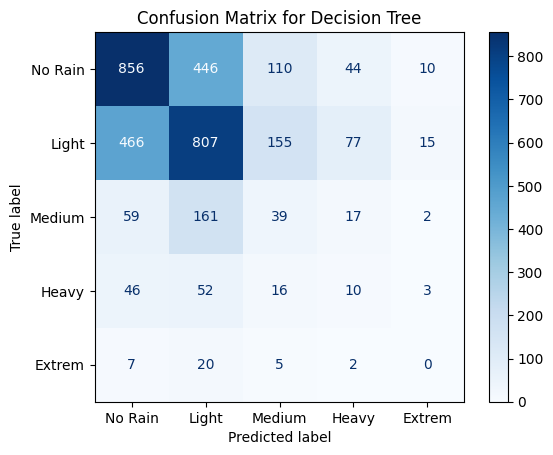

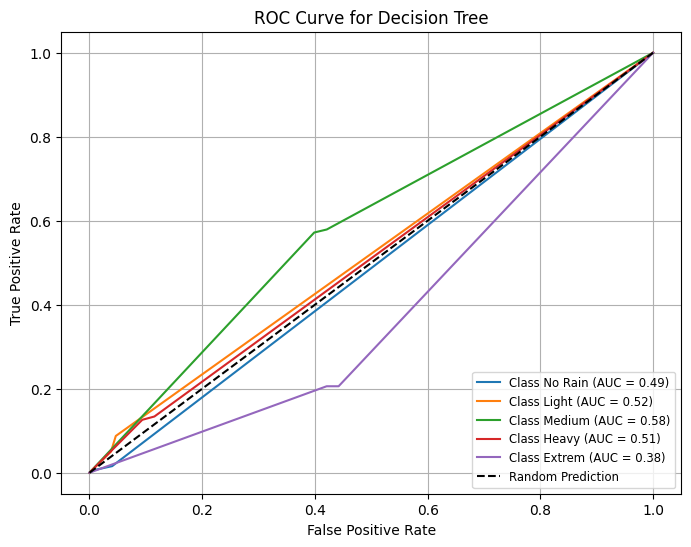

/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


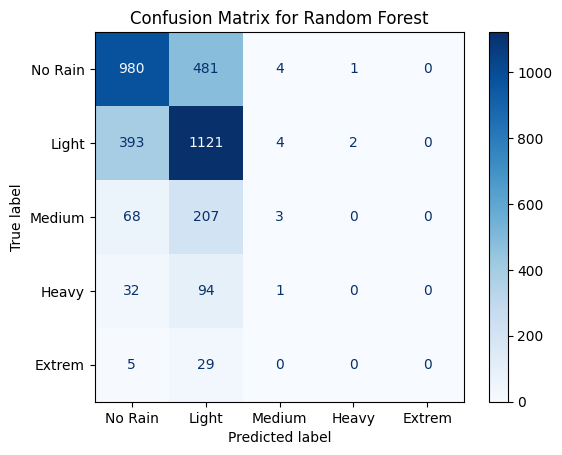

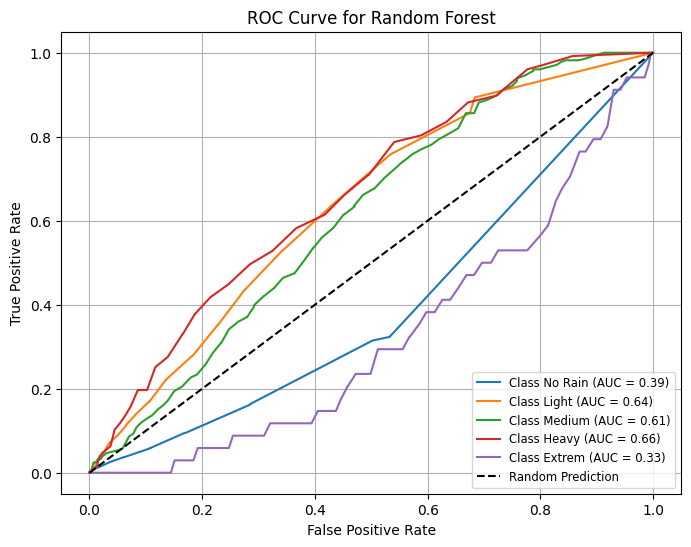

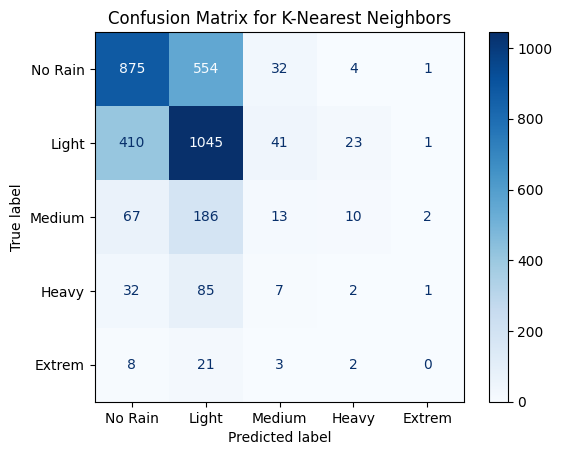

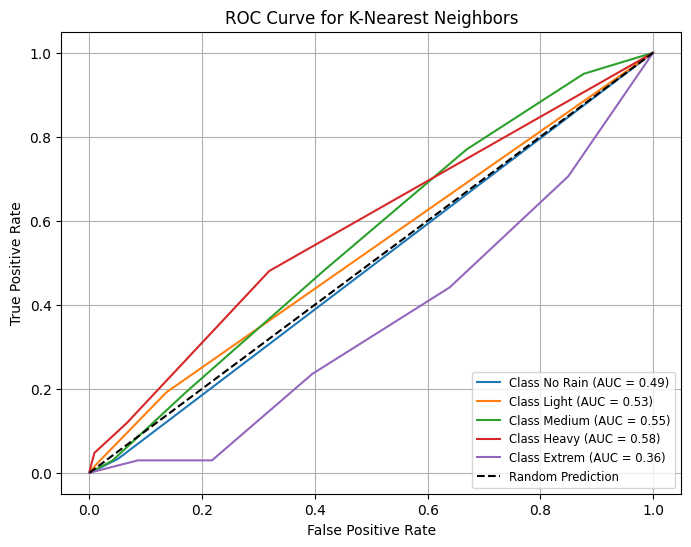

/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


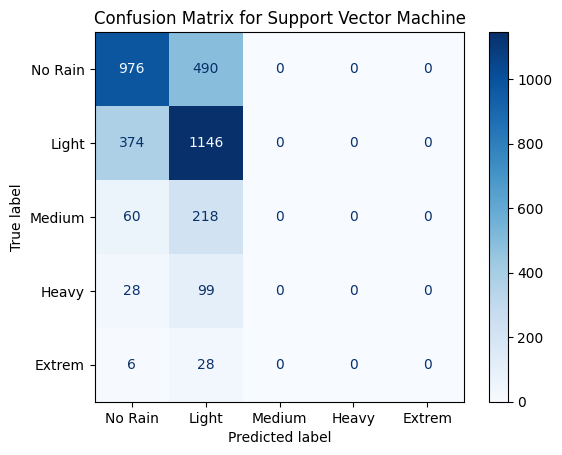

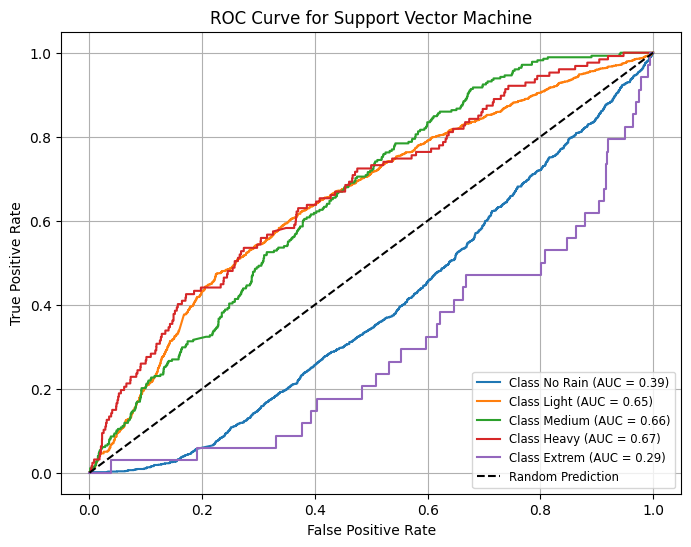

/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


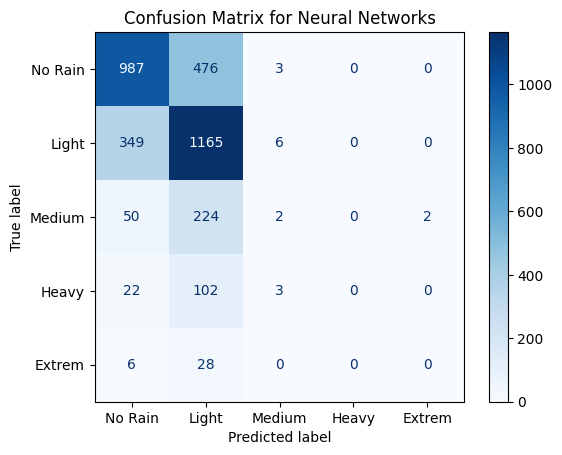

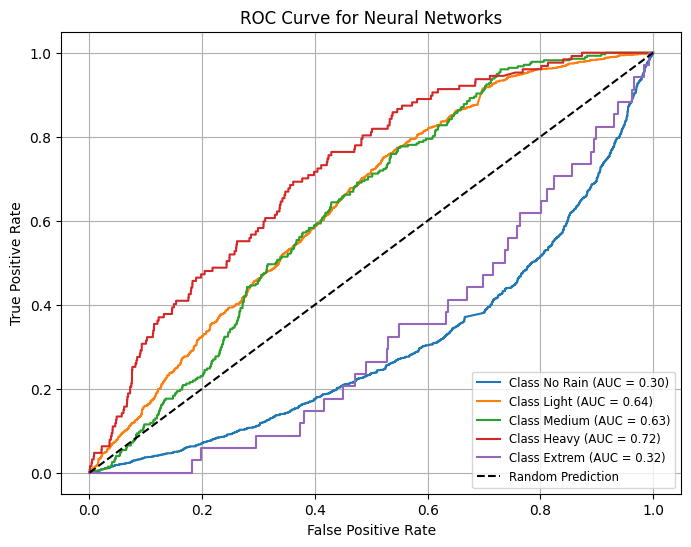

Hasil Evaluasi Model:
                    Model  Accuracy  Precision (macro avg)  \
0           Decision Tree  0.499854               0.265333   
1           Random Forest  0.614307               0.298657   
2     K-Nearest Neighbors  0.564964               0.273081   
3  Support Vector Machine  0.619562               0.250879   
4         Neural Networks  0.628905               0.284967   

   Recall (macro avg)  F1-Score (macro avg)  
0            0.266770              0.265765  
1            0.283355              0.267186  
2            0.269375              0.263674  
3            0.283941              0.265092  
4            0.289380              0.272398  


In [38]:
# Library Dasar
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Model dan Algoritma
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Data Processing dan Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Membagi variabel independen dan target
X = data_fix[[
    'temp', 
    'tempmax',
    'tempmin',
    'humidity',
    'precip',
    'sealevelpressure',
    'windspeed'
]]  # Variabel independen
y = data_fix['precip_class_Tomorrow']  # Target (multiclass classification)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarisasi target untuk ROC AUC multikelas
classes = y.unique()  # Daftar kelas
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_train_bin.shape[1]

# Daftar model klasifikasi
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=100),
    'Random Forest': RandomForestClassifier(random_state=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(probability=True, random_state=100),
    'Neural Networks': MLPClassifier(random_state=100, max_iter=1000)
}

# Evaluasi model dan penyimpanan hasil
results = []

# Plot ROC Curve untuk setiap model secara terpisah
for idx, (name, model) in enumerate(models.items()):
    # Melatih model
    model.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)  # Probabilitas untuk semua kelas

    # Evaluasi performa dasar
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (macro avg)': report['macro avg']['precision'],
        'Recall (macro avg)': report['macro avg']['recall'],
        'F1-Score (macro avg)': report['macro avg']['f1-score']
    })
    
    # Menampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Plot ROC Curve untuk tiap kelas dalam model
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(
            fpr, 
            tpr, 
            linestyle='-', 
            label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
    
    # Menambahkan garis diagonal sebagai referensi untuk prediksi acak
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Prediction')
    
    # Pengaturan grafik ROC untuk model
    plt.title(f'ROC Curve for {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize='small')
    plt.grid(True)
    plt.show()

# Menampilkan tabel hasil evaluasi
results_df = pd.DataFrame(results)
print("Hasil Evaluasi Model:")
print(results_df)


In [39]:
data_fix.head(10)

datetime  tempmax  tempmin  temp  humidity  precip  sealevelpressure  \
0 1978-02-16     32.1     25.1  28.1      83.5     0.0            1011.7   
1 1978-02-17     31.1     25.1  27.9      84.4     0.0            1012.5   
2 1978-02-18     32.1     26.1  29.0      82.7     0.0            1013.0   
3 1978-02-19     33.1     25.1  28.5      83.2     0.0            1013.3   
4 1978-02-20     31.1     24.1  27.1      85.2     0.0            1013.6   
5 1978-02-21     30.1     24.1  26.1      92.2     0.0            1013.7   
6 1978-02-22     31.1     24.1  27.4      89.7     0.0            1012.7   
7 1978-02-23     29.1     24.1  27.0      87.8     9.0            1013.3   
8 1978-02-24     32.1     25.1  27.0      87.7     0.0            1014.1   
9 1978-02-25     33.1     24.1  27.8      83.0     0.0            1015.6   

   windspeed  winddir  precipToday precip_class_Today  precipTomorrow  \
0       18.4    183.2          0.0            No Rain             0.0   
1       18.4    120.5          0.0            No Rain             0.0   
2        9.4     99.7          0.0            No Rain             0.0   
3       14.8    234.8          0.0            No Rain             0.0   
4        5.4    148.1          0.0            No Rain             0.0   
5        5.4    263.4          0.0            No Rain             0.0   
6       18.4    243.4          0.0            No Rain           100.0   
7       11.2    294.6        100.0              Light             0.0   
8       11.2    232.5          0.0            No Rain             0.0   
9       13.0    271.7          0.0            No Rain             0.0   

  precip_class_Tomorrow  
0               No Rain  
1               No Rain  
2               No Rain  
3               No Rain  
4               No Rain  
5               No Rain  
6                 Light  
7               No Rain  
8               No Rain  
9               No Rain

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi kolom 'datetime' menjadi format datetime jika belum dilakukan
data_fix['datetime'] = pd.to_datetime(data_fix['datetime'])

# Set 'datetime' sebagai index untuk analisis waktu
data_fix.set_index('datetime', inplace=True)


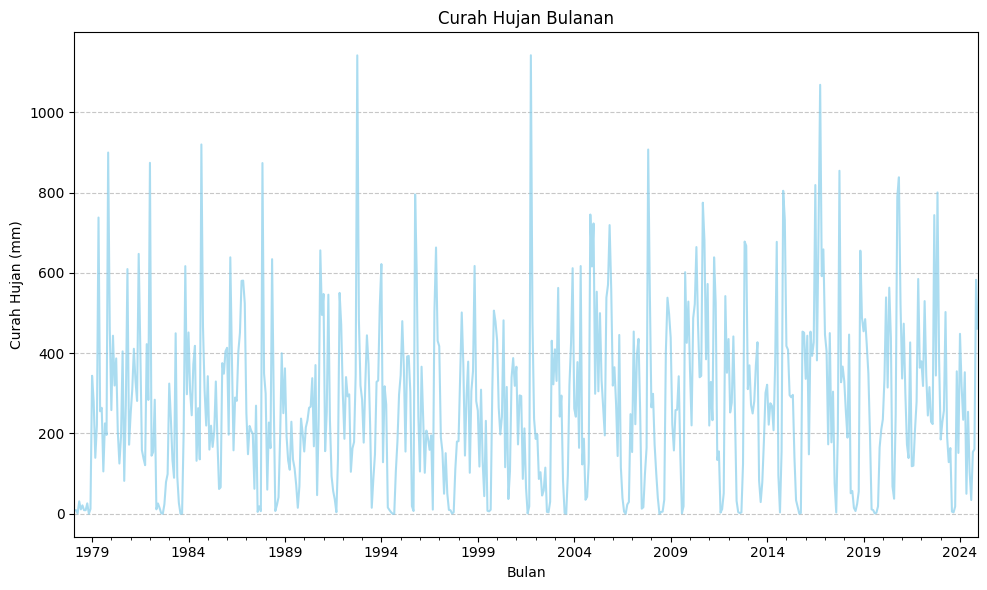

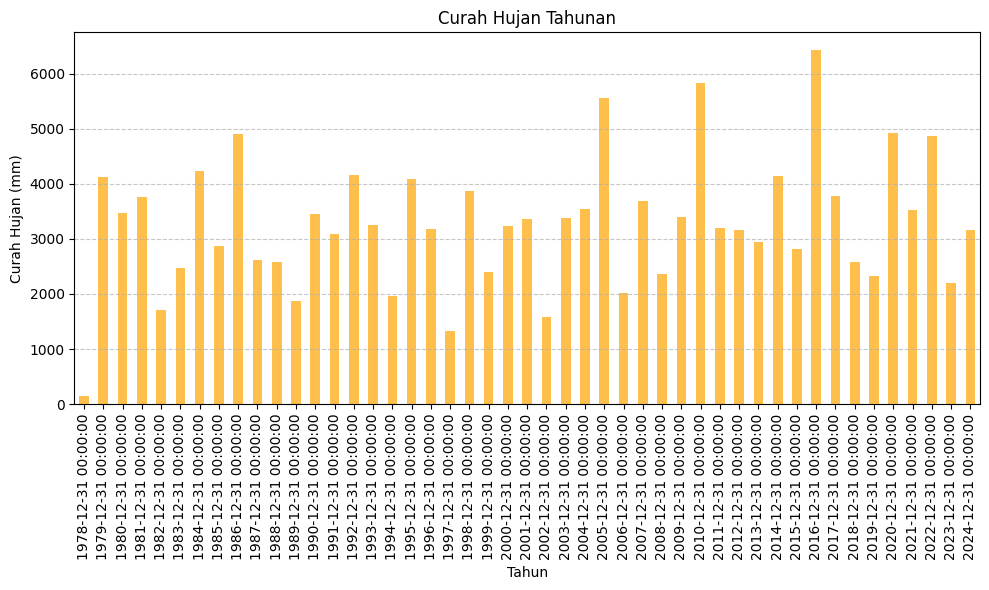

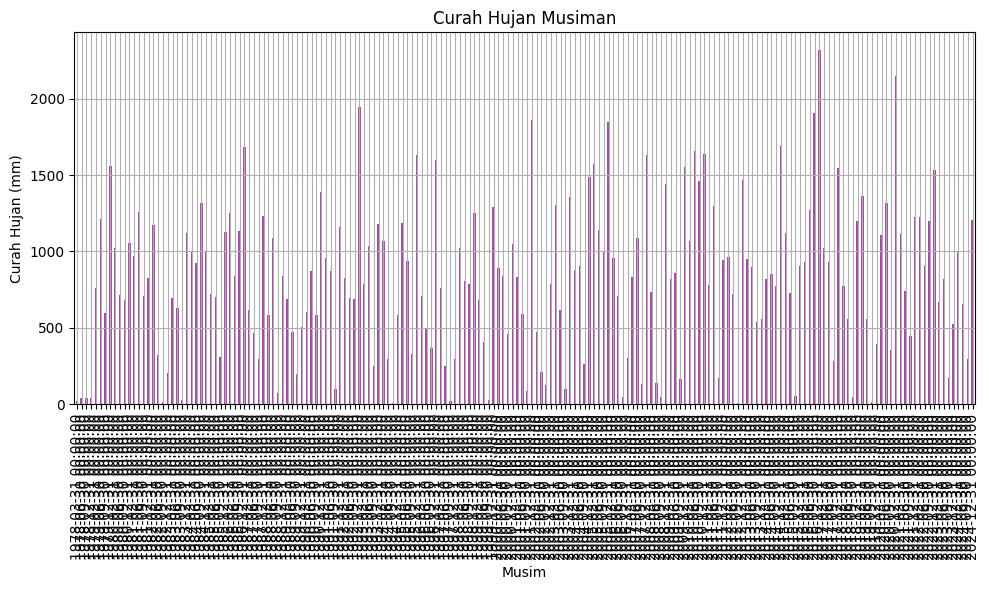

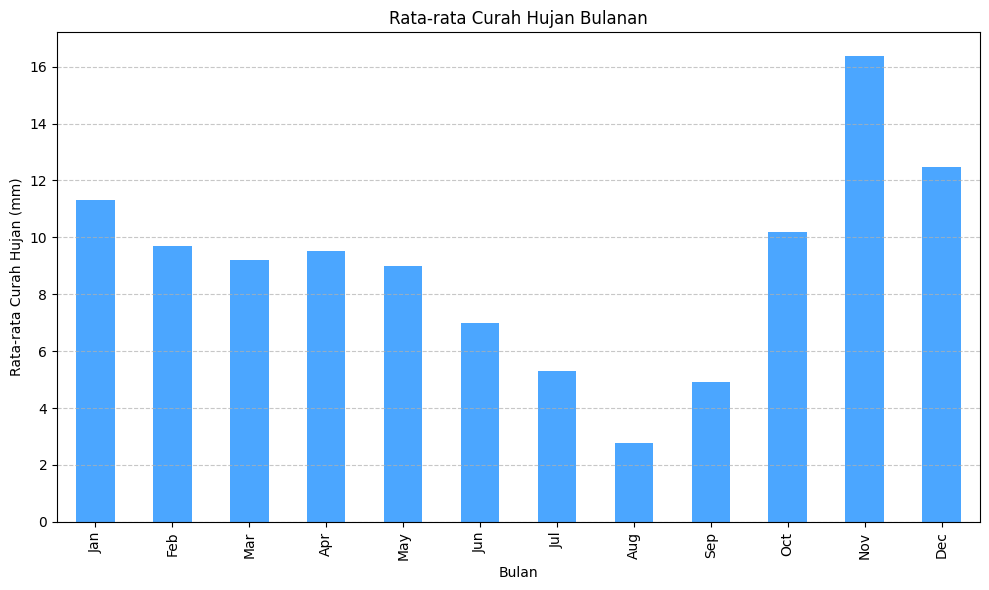

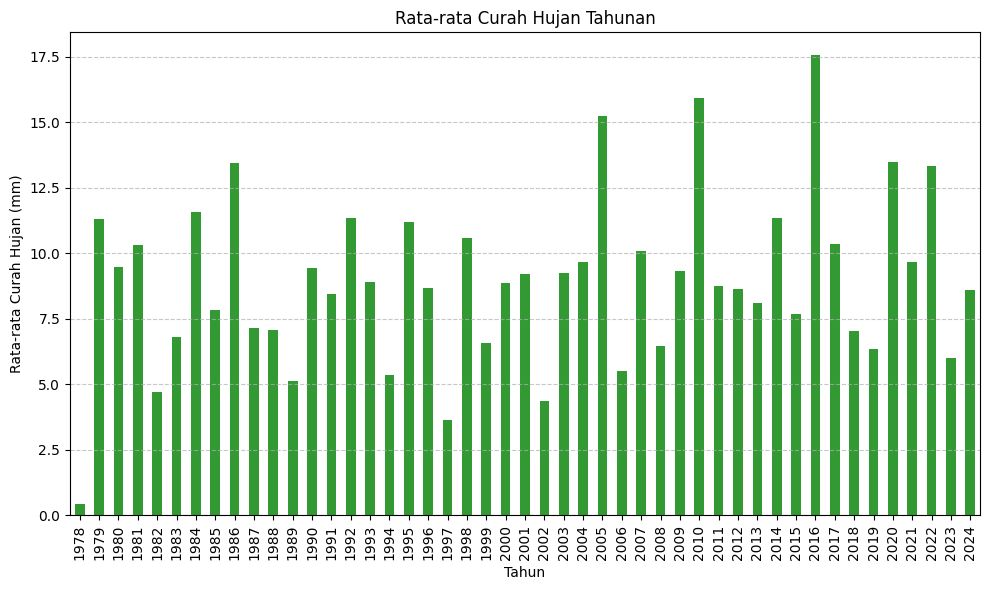

In [41]:
# Menambahkan kolom satuan waktu dari variabel datetime
data_fix['year'] = data_fix.index.year
data_fix['month'] = data_fix.index.month
data_fix['day'] = data_fix.index.day

# Agregasi curah hujan berdasarkan satuan waktu tertentu
# Curah hujan harian
daily_rainfall = data_fix['precip'].resample('D').sum()

# Curah hujan bulanan
monthly_rainfall = data_fix['precip'].resample('M').sum()

# Curah hujan tahunan
yearly_rainfall = data_fix['precip'].resample('Y').sum()

# Curah hujan musiman
seasonal_rainfall = data_fix['precip'].resample('Q').sum()

# Menghitung rata-rata curah hujan per bulan (menggabungkan semua tahun)
average_monthly_rainfall = data_fix.groupby('month')['precip'].mean()

# Menghitung rata-rata curah hujan per tahun
average_yearly_rainfall = data_fix.groupby('year')['precip'].mean()

# Visualisasi Curah Hujan Bulanan
plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='line', color='skyblue', alpha=0.7)
plt.title("Curah Hujan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Curah Hujan (mm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi Curah Hujan Tahunan
plt.figure(figsize=(10, 6))
yearly_rainfall.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Curah Hujan Tahunan")
plt.xlabel("Tahun")
plt.ylabel("Curah Hujan (mm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi Curah Hujan Musiman
plt.figure(figsize=(10, 6))
seasonal_rainfall.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Curah Hujan Musiman")
plt.xlabel("Musim")
plt.ylabel("Curah Hujan (mm)")
plt.grid()
plt.tight_layout()
plt.show()

# Visualisasi rata-rata curah hujan per bulan
plt.figure(figsize=(10, 6))
average_monthly_rainfall.plot(kind='bar', color='dodgerblue', alpha=0.8)
plt.title("Rata-rata Curah Hujan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Curah Hujan (mm)")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi rata-rata curah hujan per tahun
plt.figure(figsize=(10, 6))
average_yearly_rainfall.plot(kind='bar', color='green', alpha=0.8)
plt.title("Rata-rata Curah Hujan Tahunan")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Curah Hujan (mm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=672c3bf7-b636-46e8-b7c0-4f6feec29313' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>